In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>")) #$\color{red}{\text{ciao}}$

# Statistics
----

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader.data as reader

from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d

from datetime import datetime, timedelta
from numpy.random import multivariate_normal
import yfinance as yf
import math

import scipy.stats as scs
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy.stats import gaussian_kde

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

import seaborn as sns

#import functions as f 

import random
random.seed(1000)

plt.rc("font",family="serif")
plt.rc("font",size=14)
plt.rc("figure", figsize=(22,9))

# Basic statistics concepts

## Random variables and probability functions

A **random variable** ($RV$) is a function that maps the outcomes of random phenomena to a unique numerical value.

A random variable can be **discrete** or **continuous**.  
+ A discrete random variable $X$ has a countable number of possible values, e.g: rolling a dice. 
+ A continuous random variable $X$ takes all values in a given interval of numbers, e.g: the returns of a risky asset.

The function that relates outcomes to their probabilities in continuous random variables is called **probability density function (PDF)**.

The **distribution function** shows the probability of receiving an outcome or a lower one, that is, it shows the cumulative probabilities.

Let $X$ be a random variable, $q$ certain realization of that random variable, $f(x)$ the probability density function and $F(x)$ the distribution probability, then the probability that $X \leq q$ is:

$$ F(q) = \int_{-\infty}^{q}f(x)dx$$

The distribution function, then, represents the area under the density.

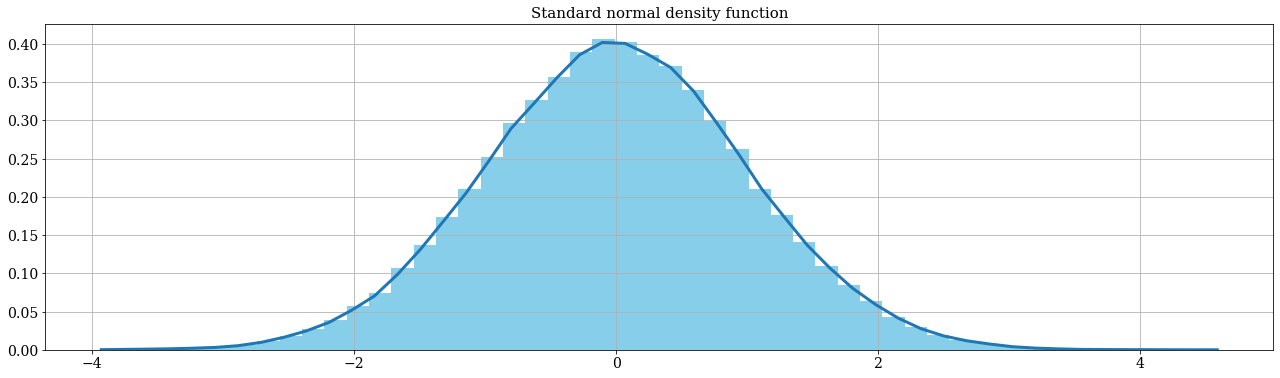

In [4]:
norm = np.random.standard_normal(100000)
norm_density = gaussian_kde(norm)
xn = np.linspace(min(norm), max(norm))

fig = plt.figure(figsize = (22,6))

plt.hist(norm, color = 'skyblue', bins = 50, density = True, alpha = 1.0)
plt.plot(xn, norm_density(xn), color = 'tab:blue', lw=3)
plt.title('Standard normal density function', fontsize = 15)
plt.grid(True)

<h4 align="center"> Density function and Boxplot </h4>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png' width="40%" align="center"/>

### Joint distributions
Let us suppose we have two $RV$ $X$ and $Y$. Their joint distribution function defines the probability that $X$ is less than some $x$ and $Y$ is less than some $y$:
$$F_{X,Y}(x,y) = P(X\leq x, Y \leq y)$$

This definition can be extended to any number of $RV$s in the same way.

### Conditional distribution
An important application of the join distribution is calculation of the conditional distribution, which is the distribution of certain $RV$s, given that other $RV$s take a particular value.

The conditional probability function of $X$ given that $Y$ takes a particular value $y$, is defined as:
$$f_{X|Y}(x) = \dfrac{f_{X,Y}(x,y)}{f_Y(y)}$$

Altertatively, the join density can be factored as:

$$ f_{X,Y}(x,y) = f_Y(y)f_{X|Y}(x) = f_X(x)f_{Y|X}(y) $$

In [5]:
x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
mu = np.array([0, 0])
cov = np.array([[1, .25],
                [.25, 1]])

rv = scs.multivariate_normal(mu, cov, 1000)
Z = rv.pdf(pos)

Text(0.5, 0.92, 'Bivariate normal density function')

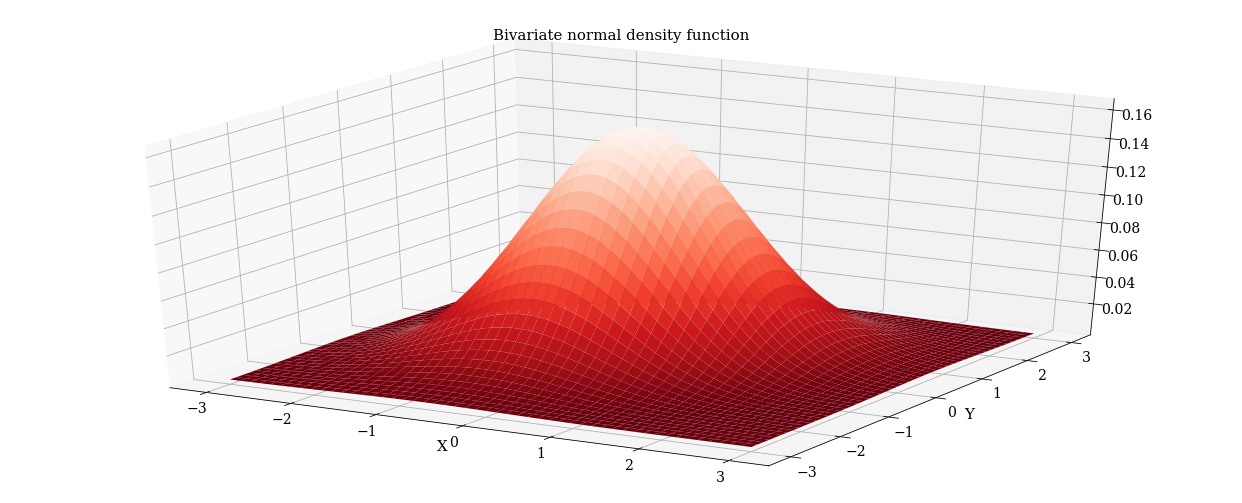

In [6]:
cmap = plt.get_cmap('Reds_r') 

fig = plt.figure(figsize = (22,9))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=cmap)
ax.set_xlabel('X', fontsize =15)
ax.set_ylabel('Y', fontsize =15)
plt.title('Bivariate normal density function', fontsize = 15)

### Independence

Suppose we have two $RVs$, $X$ and $Y$, with joint distribution $F_{X,Y} (x,y)$, where $X$ has marginal distribution $F_X(x)$ and $Y$ has marginal distribution $F_Y(y)$.

$X$ and $Y$ are said to be independent if their joint probability function is the product of their marginal probability functions:

$$F_{X,Y}(x,y) = F_X(x)F_Y(y)$$

From this definition it follows that if $X$ and $Y$ are independent, the conditional probability function of $Y$ given $X$ is the same as the marginal probability function of $Y$:

$$F_{Y|X}(y) = F_Y(y)$$


**IID (Identically and indepentendly distributed)**: Each $RV$ has the same probability distribution and it is independent of every other $RV$.

## Moments of a random variable

### Expectation

The expectation of $X$, $\mu$, is the expected value or mean of the variable. It is defined by:

$$\mu_X = E(X) = \int_{-\infty}^{\infty}x f(x) dx$$

or
$$ \mu_X=\sum_{i=1}^{N}X_i Pr(X_i)$$
in the discrete case. 



### Variance

The variance of $X$ measures the spread of the variable around its mean. It is defined by:

$$\sigma^2_X = E \left[ (X - \mu_X)^2\right] = \int_{-\infty}^{\infty}(x - \mu_X)^2 f(x) dx$$

And the discrete case:
$$ \sigma^2_X = \sum_{i=1}^{N}(X_i-\mu_X)^2 Pr(X_i) $$

### Covariance

The covariance is a measure of the joint variability of two random variables. It is defined by:

$$\sigma_{X,Y} = E[(X-\mu_X)(Y-\mu_Y)] = \int_{-\infty}^\infty \int_{-\infty}^\infty (x - \mu_X)(y - \mu_Y)f_{X,Y}(x,y)dx dy $$

And de discrete case:
$$ \sigma_{X,Y} = \sum_{i=1}^{N}\sum_{i=1}^{N}(X_i-\mu_X)(Y_i-\mu_Y) Pr(X_i, Y_i) $$

The magnitude of covariance depends upon the units by which $X$ and $Y$ are measured. A positive covariance indicates that $X$ and $Y$ tend to move in the same direction and viceversa.

Pearson's **correlation coefficient** measures the strength of linear dependence, it is scale independent and defined as:

$$\rho_{X,Y} = \dfrac{\sigma_{X,Y}}{\sigma_X\sigma_Y}$$

where $-1\leq \rho_{X,Y}\leq 1$

### Higher order moments:

The *k-th* moment of a random variable $X$ is defined by:
$$m_k' = E(X^k)= \int_{-\infty}^\infty x^k\,f(x)\,\mathrm{d}x $$

and the *k-th* centered moment of a random variable is defined by:
$$m_k = E\left[ (X - \mu) ^k \right] = \int_{-\infty}^\infty (x - \mu)^k\,f(x)\,\mathrm{d}x$$

Note that the first moment is the mean and the second centered moment is the variance.

**Skewness** and **Kurtosis** are functions of the third and fourth moments.


**Skewness**:
It is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). 

$$ \gamma = \frac{m_3}{\sigma^3} =  \frac{\int_{-\infty}^\infty (x - \mu)^3\,f(x)\,\mathrm{d}x}{\left[\int_{-\infty}^\infty (x - \mu)^2\,f(x)\,\mathrm{d}x\right]^{\frac{3}{2}}}$$

where $ m_{3}$ third centered moment.

The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. 
As a general rule of thumb:

 - If $\gamma $ is less than -1 or greater than 1, the distribution is highly skewed.
 - If $\gamma $ is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
 - If $\gamma $ is between -0.5 and 0.5, the distribution is approximately symmetric.

<img src='https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png' width="60%"/>


**Kurtosis**: 
This statistic tells you the height and sharpness of the central peak, relative to that of a standard bell curve.

$$ \beta = \frac{m_4}{\sigma^4} =  \frac{\int_{-\infty}^\infty (x - \mu)^4\,f(x)\,\mathrm{d}x}{\left[\int_{-\infty}^\infty (x - \mu)^2\,f(x)\,\mathrm{d}x\right]^{2}}$$


 - If the $\beta$ equals 3, the distribution is normal (mesokurtic).
 - If the $\beta$ is less than 3, the distribution is platykurtic.
 - If the $\beta$ is greater than 3, the distribution is leptokurtic.

<img src='https://cdn-images-1.medium.com/max/1600/1*Nqu07THa7APRTOF7kaVr5Q.jpeg' width='40%'/>



### Sample moments

When we collect date to study a random variable, what we got is the realization of that variable for each moment or individual. The true parameters of the variable in the population are unknown so we have to estimate them using the collected data: the sample.


#### Sample Mean:
$$\hat{\mu} = \dfrac{1}{n} \sum_{i=1}^nX_i$$

#### Sample Variance:

If $\mu$ is known, we can compute the sample variance by:

$$\hat{\sigma}^2= \dfrac{1}{N}\sum_{i=1}^N (x_i - \mu)^2$$

In the more realistic case, in which $\mu$ is unknown we have to use the sample mean and adjust the formula in order to find the unbiased estimator for $\sigma^2$:

$$\hat{\sigma}^2= \dfrac{1}{N-1}\sum_{i=1}^N (x_i - \hat{\mu})^2$$

#### Sample Standard Deviation:
$$\hat{\sigma} = \sqrt{\hat{\sigma}^2}$$


#### Sample Skewness:
$$ \hat{\gamma} = \frac{\sum_{i=1}^{N}(X_i-\hat{\mu})^3}{N\hat{\sigma}^3}$$

#### Sample Kurtosis:
$$ \hat{\beta} = \frac{\sum_{i=1}^{N}(X_i-\hat{\mu})^4}{N\hat{\sigma}^4}$$


#### Normal distribution
The normal distribution is the most commonly used distribution mainly beacuse is more convenient to work with than most other distributions, and it is completely described by the first and second moments.

$X$ is normally distributed if it has the density:

$$ f(x; \mu, \sigma) = \dfrac{1}{\sqrt{2\pi}\sigma} \exp \left[ - \dfrac{1}{2} \left( \dfrac{x - \mu}{\sigma}\right)^2\right]$$

and we write $X \sim N (\mu , \sigma^2)$.

The normal distribution is unimiodal, symmetric and centered on $\mu$. The variance, $\sigma^2$, governs the dispertion of the distribution.

<h4 align="center"> Probability density function </h4>
<img src='https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg' width="50%" align="center"/>

<h4 align="center"> Cumulative distribution function </h4>
<img src='https://upload.wikimedia.org/wikipedia/commons/c/ca/Normal_Distribution_CDF.svg' width="50%" align="center"/>



**Standard normal distribution**: Is the name given to the normal distribution with mean zero and unit variance, that is: $X \sim N (0,1) $.


#### Other distributions:
 - Student's $t$-distribution
 - Uniform distribution
 - Chi-square distribution
 
We can make use of numpy.random to simulate each type of random variable and see how their distributions look like.

https://www.w3schools.com/python/numpy_random.asp

In [7]:
# Standard Normal
norm = np.random.standard_normal(10000)
print('-'*100)
print('Simulating Standard Normal Variable')
print(type(norm))
print(np.shape(norm))
print('-'*100)

----------------------------------------------------------------------------------------------------
Simulating Standard Normal Variable
<class 'numpy.ndarray'>
(10000,)
----------------------------------------------------------------------------------------------------


In [8]:
# More variables...

# Student t
t = np.random.standard_t(5,10000)
t_density = gaussian_kde(t)
xt = np.linspace(min(t), max(t))

#Uniform
unif = np.random.uniform(-1,1,10000)
unif_density = gaussian_kde(unif)
xu = np.linspace(min(unif), max(unif))

#Chi square
chi = np.random.chisquare(2, 10000)
chi_density = gaussian_kde(chi)
xch= np.linspace(min(chi), max(chi))

We have generated 10000 observations of each random variable.

Each distribution has some **parameters** that define it. For instance, 
+ the normal distribution is defined by its mean and variance, 
+ the Student's t and Chi square distributions are defined by their degree of freedom, and 
+ the uniform distribution is defined by its minimum and maximum values.

The process of generating these many observations is known as **Monte Carlo simulations**. Let's see how these variables look like.

We can use gaussian_kde (kernel density estimation) to estimate the probability density function

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

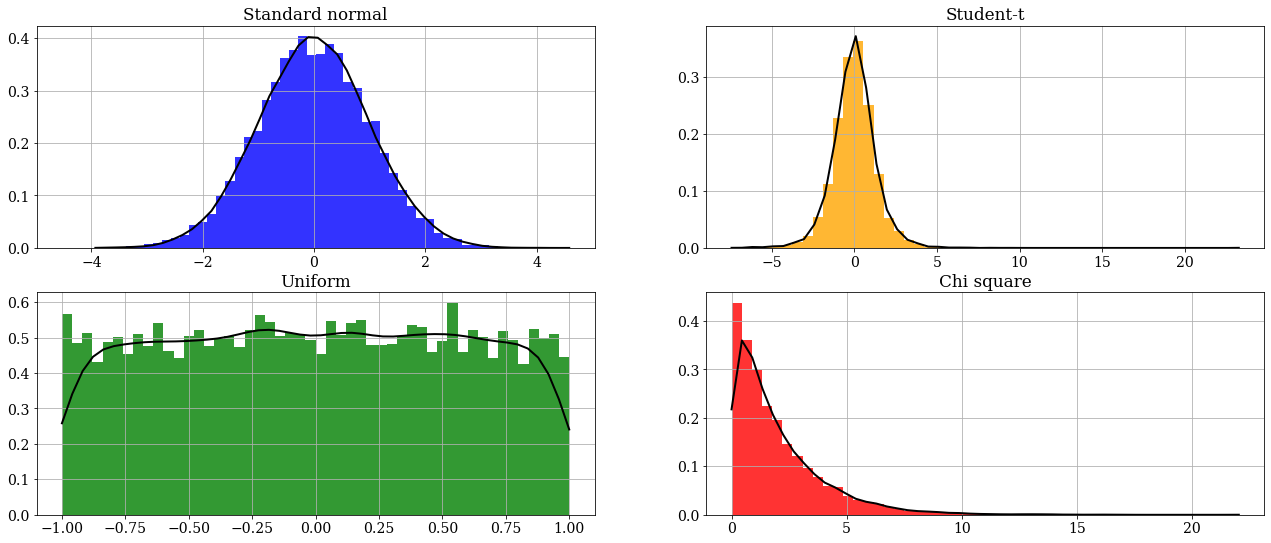

In [9]:
fig = plt.figure(figsize = (22,9))
plt.subplot(2,2,1)
plt.hist(norm, color = 'blue', bins = 50, density = True, alpha = 0.8)
plt.plot(xn, norm_density(xn), color = 'black', lw=2)
plt.title('Standard normal')
plt.grid(True)

plt.subplot(2,2,2)
plt.hist(t, color = 'orange', bins = 50, density = True, alpha = 0.8 )
plt.plot(xt, t_density(xt), color = 'black', lw=2)
plt.title('Student-t')
plt.grid(True)

plt.subplot(2,2,3)
plt.hist(unif, color = 'green', bins = 50, density = True, alpha = 0.8)
plt.plot(xu, unif_density(xu), color = 'black', lw=2)
plt.title('Uniform')
plt.grid(True)

plt.subplot(2,2,4)
plt.hist(chi, color = 'red', bins = 50, density = True, alpha = 0.8)
plt.plot(xch, chi_density(xch), color = 'black', lw=2)
plt.title('Chi square')
plt.grid(True)

Let's work with the standard normal variable. 

We know that a standard normal distribution has mean = 0 and standard deviation = 1. 

Let's calculate those moments using our generated data.

In [10]:
mu_hat = norm.mean()
sigma_hat = norm.std()

print("The sample mean is " + str(np.round(mu_hat,4)))
print("The sample standard deviation is " + str(np.round(sigma_hat,4)))

The sample mean is -0.009
The sample standard deviation is 1.0023


If we had all the population data, then we would have the true mean and variance of the variable. 

Since we are only working with a portion of that population (the sample), we will always have some estimation error.

### Skewness and kurtosis

We can also generate distributions using *scipy.stats*. 

The module *skewnorm* allows us to create asymmetric distributions. 

It takes a real number as the asymmetric parameter. 

When that number equals zero, the distribution is normal.

In [11]:
from scipy.stats import skewnorm, t

skew_a = [-50, 0, 50]
x0 = skewnorm.rvs(skew_a[0], size=10000)
x1 = skewnorm.rvs(skew_a[1],size=10000)
x2 = skewnorm.rvs(skew_a[2], size=10000)

In [12]:
print('Simulating asymmetric distributions')
print(type(x1))
print(np.shape(x1))
print('-'*100)

Simulating asymmetric distributions
<class 'numpy.ndarray'>
(10000,)
----------------------------------------------------------------------------------------------------


''

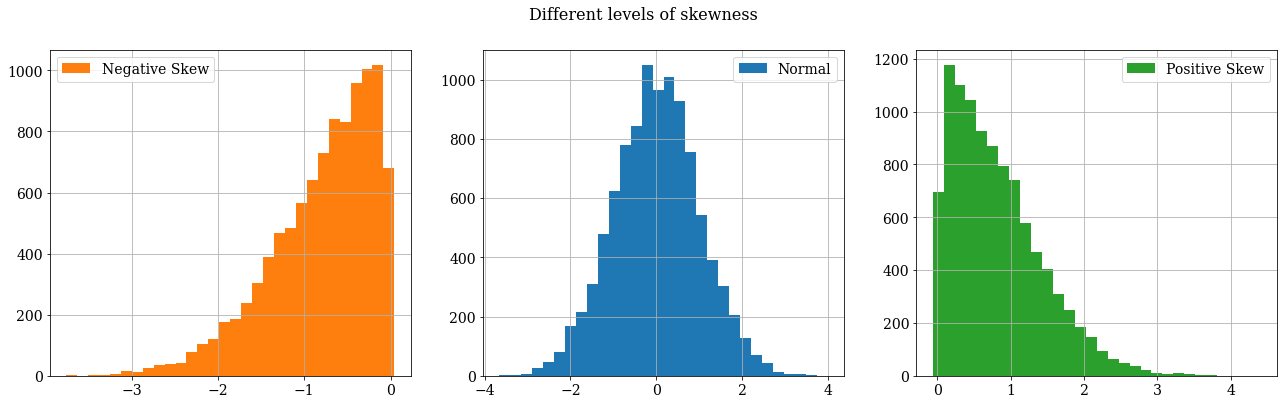

In [13]:
fig = plt.figure(figsize = (22,6))
fig.suptitle('Different levels of skewness', fontsize = 16)

plt.subplot(1,3,1)
plt.hist(x0, color = 'tab:orange', label='Negative Skew', bins = 30)
plt.grid(True)
plt.legend(loc = 'upper left')

plt.subplot(1,3,2)
plt.hist(x1, color = 'tab:blue', label='Normal', bins = 30)
plt.grid(True)
plt.legend(loc = 'best')

plt.subplot(1,3,3)
plt.hist(x2, color = 'tab:green', label='Positive Skew', bins = 30)
plt.grid(True)
plt.legend(loc = 'upper right')

;

Let's now create distributions with different levels of kurtosis 

In [14]:
df = [5, 10, 200] 

y0 = t.rvs(df[0], size=10000, loc =0)
y1 = t.rvs(df[1], size=10000, loc =0)
y2 = t.rvs(df[2], size=10000, loc =0)

In [15]:
print('Simulating distributions with different levels of kurtosis')
print(type(y1))
print(np.shape(y1))
print('-'*100)

Simulating distributions with different levels of kurtosis
<class 'numpy.ndarray'>
(10000,)
----------------------------------------------------------------------------------------------------


''

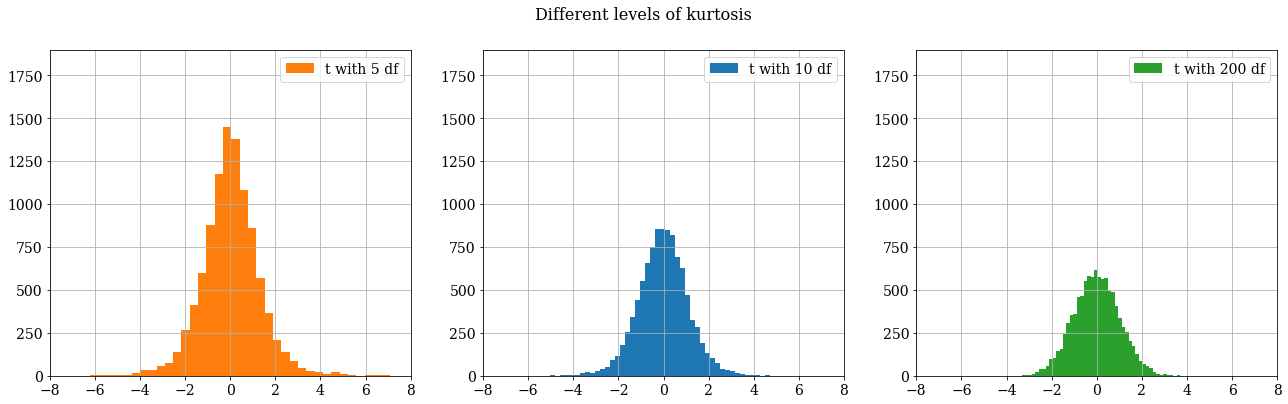

In [16]:
ylim = 1900
xlim = 8

fig = plt.figure(figsize = (22,6))
fig.suptitle('Different levels of kurtosis', fontsize = 16)

plt.subplot(1,3,1)
plt.hist(y0, color = 'tab:orange', label='t with 5 df', bins = 50)
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(0,ylim)
plt.xlim(-xlim,xlim)

plt.subplot(1,3,2)
plt.hist(y1, color = 'tab:blue', label='t with 10 df', bins = 50)
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(0,ylim)
plt.xlim(-xlim,xlim)

plt.subplot(1,3,3)
plt.hist(y2, color = 'tab:green', label='t with 200 df', bins = 50)
plt.grid(True)
plt.legend(loc = 'best')
plt.ylim(0,ylim)
plt.xlim(-xlim,xlim)

;

# Financial Time Series

----
## Asset returns

Most financial studies involve returns, instead prices, of assets. Two main reasons are given for using return. First, for average investors, return of an asset is a complete and scale-free summary of the investment opportunity. Second, return series are easier to handle than prices series because the former have more attractive statistical properties, which will be studied later.

There are, however, several important definitions of asset returns.

Let $P_t$ be the price of an asset at time $t$.

### One-period simple return

Holding the asset for ine period from date $t-a$ to date $t$ would result in a simple gross return of:

$$1 + R_t = \dfrac{P_t}{P_{t-1}}$$

The corresponding one-period simple net return is:

$$R_t = \dfrac{P_t}{P_{t-1}} - 1$$

### Multiperiod simple return

Holding the asset for $k$ periods between dates $t-j$ and $t$ gives a $k$-period simple gross return of:

$$1 + R_t[k] = \dfrac{P_t}{P_{t-k}} = \dfrac{P_t}{P_{t-1}} \times \dfrac{P_{t-1}}{P_{t-2}}\times \dots \dfrac{P_{t-(k-1)}}{P_{t-k}}$$

$$ 1 + R_t[k] = (1 + R_t)\times(1 + R_{t-1}) \times \dots (1 + R_{t-(k-1)}) $$

$$1 + R_t[k] = \prod_{j=0}^{k-1}(1 + R_{t-j})$$

In practice, the actual time interval is important in discussing and comparing returns (e.g. daily, monthly or annual). If the asset was held for k years, then the annualized (average) return is defined as:

$$Annualized \lbrace R_t[k] \rbrace = \left[ \prod_{j=0}^{k-1}(1 + R_{t-j}) \right]^{1/k} -1 $$

### Continuous compounding

The net asset value A of continuous compounding is:

$$A = C \exp (r\times n)$$

where $r$ is the interest rate (say, annual), $C$ is the initial capital and $n$ is the number of periods (say, years).

From the above equation we have:

$$C = A \exp (-r\times n)$$

 which is referred to as the *present value* of an asset that is worth $A$ dollars $n$ years from now, assuming that the continously compounded interest rate is $r$ per annum.
 
### Continuously compounded return
 
The above formula can be applied to asset prices. We then have:

$$P_{t} = P_{t-1} \exp(r_t)$$

If we apply natural logarithm, we get:

$$r_t = ln(1 + R_t) = ln \left(\dfrac{P_t}{P_{t-1}}\right) = p_t - p_{t-1}$$

where $p_t = ln(p_t)$

The natural logarithm of the simple gross return of an asset is called the continuously compounded return or *log return*.

Continously compounded returns $r_t$ enjoy some advantages over the simple net return $R_t$. First, consider multiperiod returns. We have:

$$r_t[k] = ln(1 + R_t[k]) = ln[(1 + R_t)(1+R_{t-1})\dots (1+R_{t-(k-1)}]$$

$$r_t[k] = ln(1 + R_t) + ln(1 + R_{t-1}) + \dots + ln(1 + R_{t-(k-1)}) $$

$$r_t[k] = r_t + r_{t-1}+ \dots + r_{t-(k-1)}$$

Thus, the continuously compounded multiperiod return is simply the sum of continuously compounded one-period returns involved. Second, statistical properties of log returns are more tractables.

### Portfolio return

The simple net return of a portfolio consisting of $N$ assets is a weighted average of the simple net returns of the assets involved, where the weight on each asset is the percentage of the porfolio's value invested in that asset. 

$$R_{pt} = \sum_{i = 1}^N \omega_i R_{it}$$


## Distributions of returns

The most general model for the log returns {$r_{it}: i =1, \dots, N; t= 1, \dots ,T $} is its joint distribution function:

$$F_r(r_{11},\dots,t_{N1}; \dots ; r_{1T},\dots,t_{NT}; Y ; \theta)$$

where $Y$ is a *state vector* consisting of variables that sumarize the environment in which the asset returns are determined, and $\theta$ is a vector of parameters that uniquely determines the distribution function $F_r(.)$. The probability distribution $F_r(.)$ governs the stochastic behavior of the returns $r_{it}$ and $Y$. 

This model is too general to be of practical value. However, it provides a general framework with respect to which an econometric model for asset returns $r_{it}$ can be put in a proper perspective.

### Distribution assumptions

#### Normal distribution
A traditional assumption made in financial study is that the simple returns are iid as normal with fixed mean and variance. This assumption makes statistical properties of asset returns tractables., but it encounters several difficulties. First, the lower bound of a simple return is -1. Yet the normal distribution may assume any value in the real line and, hence, has no lower bound. Second, if $R_{it}$ is normally distributed, then the muiltiperiod simple return $R_{it}[k]$ is not normally distributed. Third, the normality assumption is not supported by many empirical asset returns, which tend to have a positive excess kurtosis.

#### Lognormal distribution
Another commonly used assumption is that the log returns $r_t$ of an asset are iid as normal with mean $\mu$ and variance $\sigma^2$. The simple returns are then iid lognormal random variables with mean and variance given by:

$$E(R_t) = \exp(\mu + \dfrac{\sigma^2}{2})-1$$

$$Var(R_t) = [\exp(2\mu + \sigma^2)][\exp(\sigma^2) -1]$$

#### Stable distribution
The stable distributions are a natural generalization of normal distributions in that they are stable under addition, which meets the need of continuously compounded returns. Furthermore, stable distributions are capable of capturing excess kurtosis shown by historical stock returns. However, nonnormal stable distributions do not have a finite variance, which is in conflict with most finance theories. In addition, statistical modeling using nonnormal stable distributions is difficult. An example of nonnormal stable distributions is the Cauchy distribution, which is symmetric with respect to its median but has infinite variance.


## Empirical properties of returns

We are going to import data of the S&P 500 index. We will plot the simple daily returns and the daily log returns. As expected, the plots show that the basic patternt of simple and log returns are similar.

In [17]:
SP500 = yf.download('^GSPC', period='10y')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [18]:
# Simple returns

simp_rets = SP500.pct_change().dropna()

# Log returns

log_rets = np.log(SP500/ SP500.shift(1)).dropna()

Text(0.5, 1.0, 'Log returns')

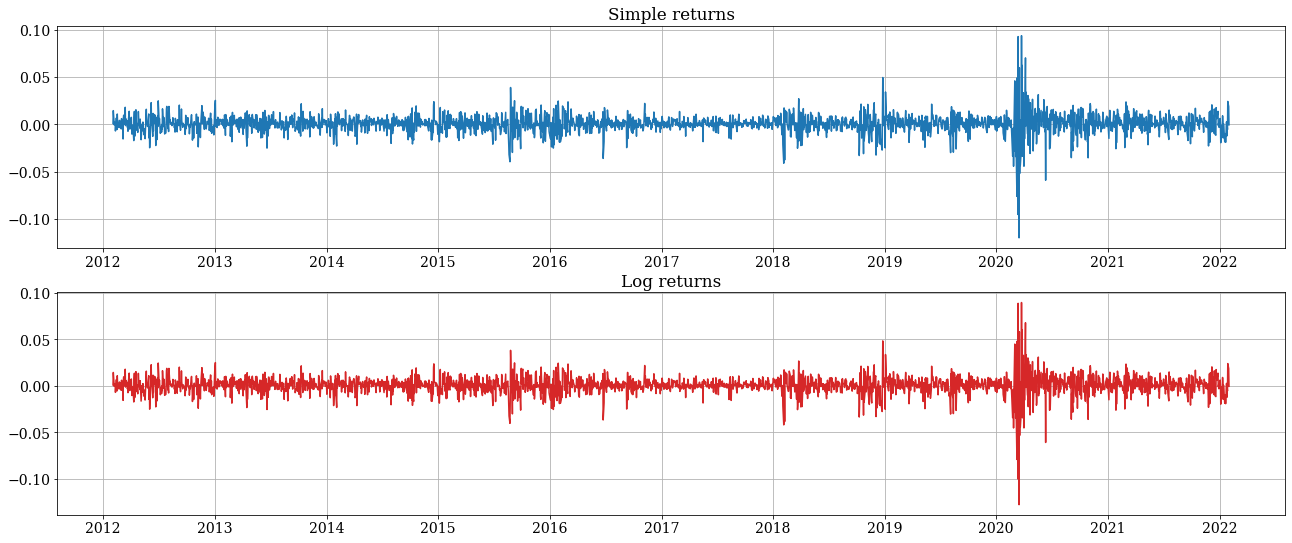

In [19]:
plt.figure(figsize = (22,9))
plt.subplot(2,1,1)
plt.plot(simp_rets)
plt.grid(True)
plt.title('Simple returns')

plt.subplot(2,1,2)
plt.plot(log_rets, color = 'tab:red')
plt.grid(True)
plt.title('Log returns')

We can also study the empirical density functions and compare them with the normal probability density function evaluated by using the sample mean an standard deviation of the S&P500.

In [20]:
simp_rets_density = gaussian_kde(simp_rets)
srets = np.linspace(min(simp_rets), max(simp_rets))

log_rets_density = gaussian_kde(log_rets)
lrets = np.linspace(min(log_rets), max(log_rets))

In [21]:
mu1 = simp_rets.mean()
sigma1 = simp_rets.std()
mu2 = log_rets.mean()
sigma2 = log_rets.std()

In [22]:
normal1 = np.random.normal(mu1, sigma1, len(simp_rets))
normal1_density = gaussian_kde(normal1)
xn1 = np.linspace(min(normal1), max(normal1))

normal2 = np.random.normal(mu2, sigma2, len(log_rets))
normal2_density = gaussian_kde(normal2)
xn2 = np.linspace(min(normal2), max(normal2))

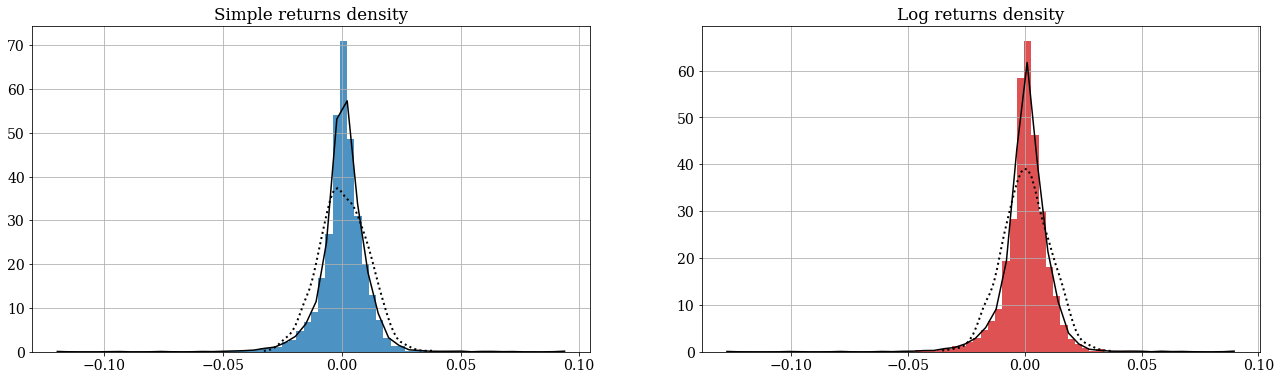

In [23]:
fig = plt.figure(figsize = (22,6))
plt.subplot(1,2,1)
plt.hist(simp_rets, color = 'tab:blue', bins = 70, density = True, alpha = 0.8)
plt.plot(srets, simp_rets_density(srets), color = 'black', lw=1.5)
plt.plot(xn1, normal1_density(xn1), linestyle = 'dotted', color = 'black', lw=2)
plt.title('Simple returns density')
plt.grid(True)

plt.subplot(1,2,2)
plt.hist(log_rets, color = 'tab:red', bins = 70, density = True, alpha = 0.8)
plt.plot(lrets, log_rets_density(lrets), color = 'black', lw=1.5)
plt.plot(xn2, normal2_density(xn2), linestyle = 'dotted', color = 'black', lw=2)

plt.title('Log returns density')
plt.grid(True)

The plots indicates that the normality assumption is questionable. The empirical density function has a higher peak around its mean, but fatter tails than that corresponding normal distribution. In other words, the empirical distribution is taller and skinnier, but with a wider support than the corresponding normal density.

# Linear time series analysis

* * *

Economic time series (series of data points indexed in time order) are considered to be realizations of stochastic processes.
That is, each point of an economic time series is considered to be an observation of a random variable.
We can look at a stochastic process as a sequence of variables characterized by joint probability distributions for every finite set of different time points. In particular, we can consider the distribution $f(x_t)$ of each variable $X_t$ at each moment.

Treating an asset return as a collection of random variables over time, we have a time series $\lbrace r_t \rbrace$. Linear time series analysis provides a natural frameworkk to study the dynamic structure of such a series. 

For an asset return $r_t$, simple models attemp to capture the linear relationship between $r_t$ and information available prior to time $t$. As such, correlation plays and important role in understanding these models. In particular, **correlations between the variable of interest and its past values become the focus of linear time series analysis.**



## Stationarity 

The foundation of time series analysis is stationarity. 

A time series $\lbrace r_t \rbrace$ is said to be *strictly stationary* if the joint distribution of $(r_{t_1}, \dots , r_{t_k})$ is identical to that of $(r_{t_{1+j}}, \dots , r_{t_{k+j}})$. In other words, strict stationarity requieres that the joint distribution $(R_{t_1}, \dots , R_{t_k})$ is invariant under time shift. Since this is a very strong condition and hardly verified, a weaker version is often assumed. 

A time series ${r_t}$ is *weakly stationary* if both the mean of $r_t$ and the covariance between $r_t$ and $r_{t-j}$ are time invariant, where j is an arbitrary integer. That is:
- $E(r_t) =\mu$, which is a constant
- $Cov(r_t, r_{t-j}) = \gamma_j$, which only depends on j.

Stationarity is so important because it enables one to make inference concerning futures observations. Since inference is based on sample moments, if these are not constant over time, inferences will be meaningless.


To observe how stationary series behave, let's consider two series, A and B. Series A is generated from a stationary process with fixed parameters, series B is generated with parameters that change over time.


In [24]:
def generate_series(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)

''

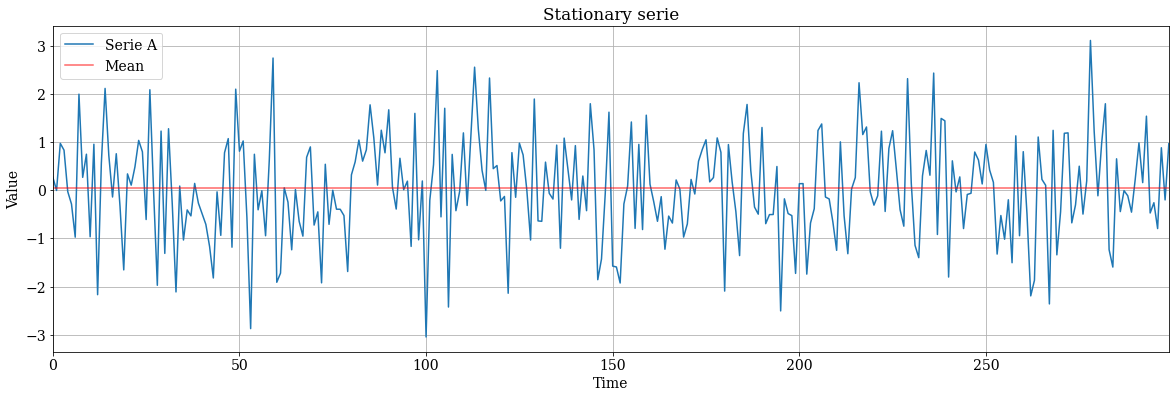

In [25]:
#SERIE A

params = (0, 1)
T = 300

A = np.zeros(T)
A = pd.Series(A, name ='A')
for t in range(T):
     A[t] = generate_series(params)


fig = plt.figure(figsize=(20,6))        
plt.plot(A, label = 'Serie A')
plt.axhline(A.mean(), color='red', alpha = 0.6, label = 'Mean')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='best')
plt.title('Stationary serie')
plt.autoscale(tight=True, axis='x')
plt.grid(True)
;

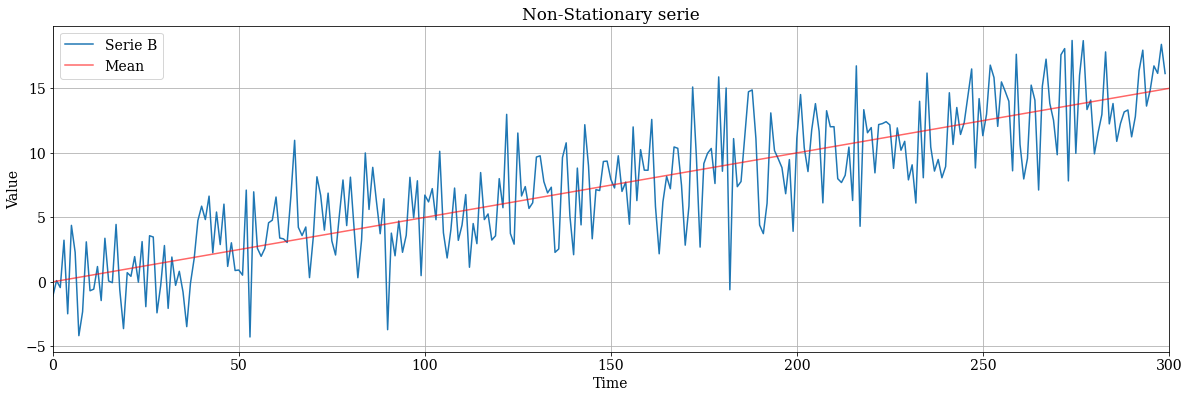

In [26]:
#SERIE B

T = 300
B = np.zeros(T)
B = pd.Series(B, name ='B')

for t in range(T):
    params = (t*0.05, 3)
    B[t] = generate_series(params)


fig = plt.figure(figsize=(20,6))        
plt.plot(B, label='Serie B')
plt.plot(np.linspace(0,T), np.linspace(0,T)*0.05, color='red', alpha = 0.6, label='Mean')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='best')
plt.title('Non-Stationary serie')
plt.autoscale(tight=True, axis='x')
plt.grid(True);

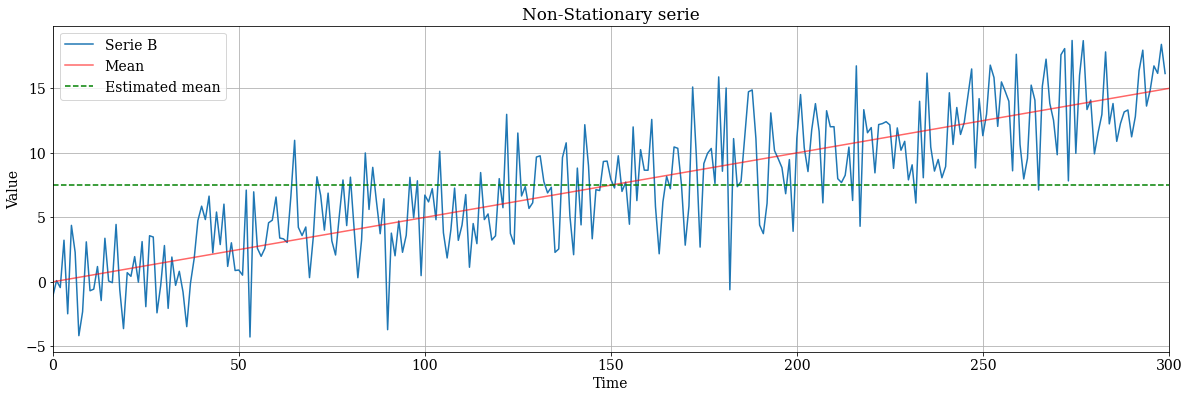

In [27]:
fig = plt.figure(figsize=(20,6))        
plt.plot(B, label='Serie B')
plt.plot(np.linspace(0,T), np.linspace(0,T)*0.05, color='red', alpha = 0.6, label='Mean')
plt.axhline(B.mean(), color = 'green', linestyle = 'dashed', label = 'Estimated mean')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='best')
plt.title('Non-Stationary serie')
plt.autoscale(tight=True, axis='x')
plt.grid(True)

### Testing for Stationarity

The Augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample, which means that the serie is nonstationary.

In [28]:
def check_for_stationarity(X, cutoff=0.01):
    
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(round(pvalue,4)) + ' The series ' + X.name +' is likely stationary.' )

    else:
        print ('p-value = ' + str(round(pvalue,4)) + ' The series ' + X.name +' is likely non-stationary.')
    
    return 

In [29]:
check_for_stationarity(A)
check_for_stationarity(B)

p-value = 0.0 The series A is likely stationary.
p-value = 0.7926 The series B is likely non-stationary.


A non-stationary serie is said to have a **unit root** or to be **integrated**. We will denote integration order-i as $I(i)$.

If a serie is $I(d)$ it has $d$ unit roots and yields a stationary process by taking repeated differences $d$ times. Similarly, to get a $I(d)$ serie, we can take an $I(0)$ series and iteratively take the cumulative sum $d$ times (which is the discrete way of integration).


### Spurious regresion

One of the problems that $I(1)$ series posses is that they may lead to the so-called **spourious regression** phenomenon. 

Suppose that two $I(1)$ processes, $y_t$ and $x_t$, are independently distributed. Consider the following simple regression:
$$ y_t = \beta x_t + \mu_t$$

Since $y_t$ and $x_t$ are independent, there should be no systematic relationship between them, and therefore, we should expect that an OLS estimate of $\beta$ should be close to zero. Nevertheless, in the case of spurious regression, $\hat{\beta}$ does not converge to its true value of zero, and its t-statistic always indicates significance of the estimate. 

### Real data

In [30]:
apple = yf.download('AAPL', period='5y')['Adj Close']
apple.name = 'AAPL'

[*********************100%***********************]  1 of 1 completed


In [31]:
check_for_stationarity(apple)

p-value = 0.9941 The series AAPL is likely non-stationary.


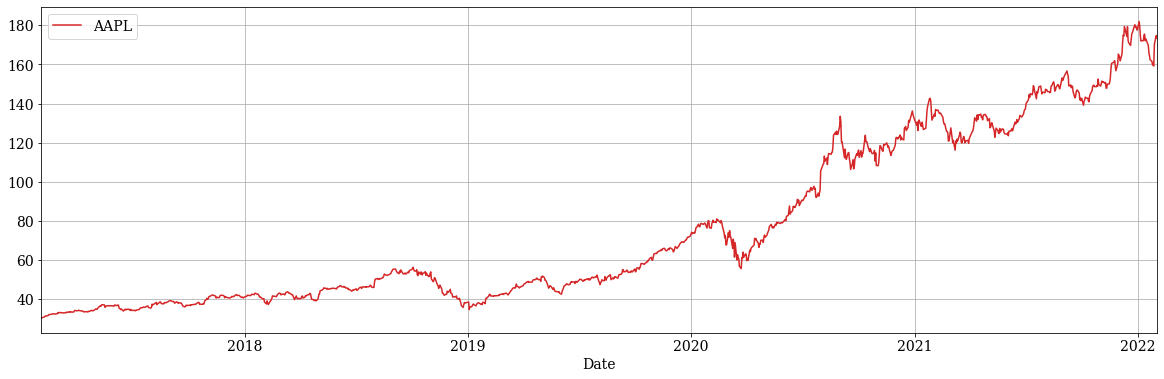

In [32]:
fig = plt.figure(figsize = (20,6))
plt.plot(apple, label = 'AAPL', color = 'tab:Red')
plt.xlabel('Date')
plt.legend(loc ='best')
plt.autoscale(axis = 'x', tight =True)
plt.grid(True)

Now let's take calculate first differences of the serie and returns and check stationary again.

In [33]:
d_apple = apple.diff()[1:]
d_apple.name = 'AAPL first differences'
check_for_stationarity(d_apple)

p-value = 0.0 The series AAPL first differences is likely stationary.


We can also take first differences of the prices logarithm, which, as we studied before, is equivalent to take log returns.

In [34]:
lr_apple = np.log(apple).diff()[1:]
lr_apple.name = 'AAPL log returns'
check_for_stationarity(lr_apple)

p-value = 0.0 The series AAPL log returns is likely stationary.


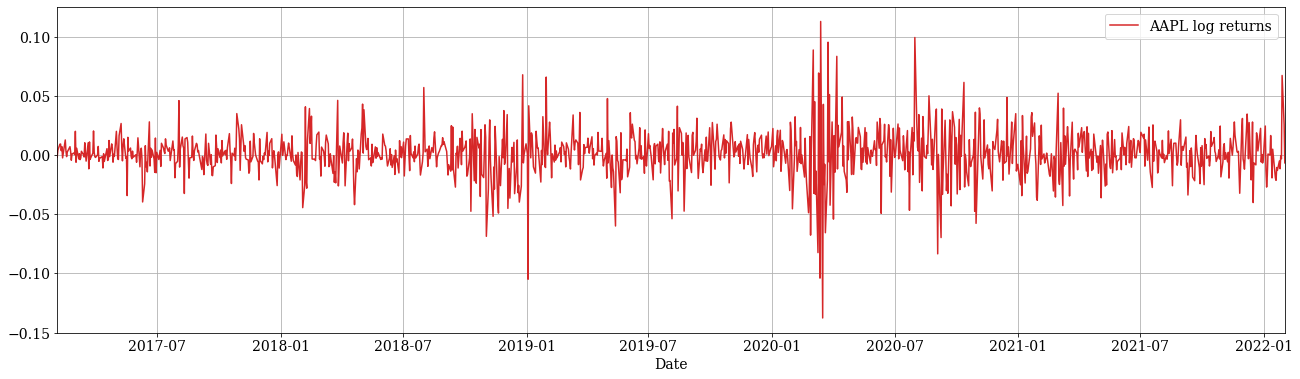

In [35]:
fig = plt.figure(figsize = (22,6))
plt.plot(lr_apple, label = 'AAPL log returns', color = 'tab:red')
plt.xlabel('Date')
plt.legend(loc ='best')
plt.autoscale(axis = 'x', tight =True)
plt.grid(True)

***Note:*** The reason returns are used for modeling in quantitive finance is that they are far more stationary than prices. This makes them easier to model and returns forecasting more feasible.

## Autocorrelation function (ACF)

Consider a weakly stationary serie $r_t$. When the linear dependence between $r_t$ and its past values $r_{t-i}$ is of interest, the concept of correlation is generalized to autocorrelation. The correlation coefficient between $r_t$ and $r_{t-k}$ is called the *lag-k autocorrelation* of $r_t$, and it is commonly denoted by $\rho_k$. Under the weak stationarity, we have:

$$\rho_k = \dfrac{cov(r_t, r_{t-k})}{\sqrt{var(r_t)var(r_{t-k})}} =\dfrac{Cov(r_t, r_{t-k})}{Var(r_t)} =  \dfrac{\gamma_j}{\gamma_0}$$

where the property $Var(r_t) = Var(r_{t-k})$ for a weakly stationary series is used. From the definition we have $\rho_0 = 1$ and $-1 \leq \rho_k \leq 1$.

### Testing ACF

For a given positive integrer $k$, we can test $H_0: \rho_k = 0$ vs $H_a: \rho_k \neq 0$. The test statistic is:

$$t = \dfrac{\hat{\rho_k}}{\sqrt{(1+2\sum_{i=1}^{k-1}\hat{\rho_i}^2)/T}}$$

In finite samples, $\hat{\rho_k}$ is a biased estimator of $\rho_k$. The bias is in the order of $1/T$, which can be substantial when the sample size $T$ is small. However, in most financial applications, $T$ is relatively large so that the bias is not serious.

Financial application often require to test jointly that several autocorrelations of $r_t$ are zero. That is, $H_0: \rho_1 = \dots= \rho_m = 0$ against $H_a: \rho_i \neq 0$ for some $i \in \lbrace 1, \dots, m\rbrace$. 

**Ljung and Box (1978)** statistic is:

$$Q(m) = T(T+2)\sum_{k=1}^m \dfrac{\hat{\rho_k}^2}{T-k}$$

The decision rule is to reject $H_0$ if $Q(m) > \chi_\alpha^2$, where $\chi_\alpha^2$ is the $100(1-\alpha)th$ percentile of a chi-squared distribution with $m$ degrees of freedom.

The statistics $\hat{\rho_1},\hat{\rho_1}, \dots $ are called the *sample autocorrelation function* of $r_t$ and it plays an important role in linear time series analysis.  A linear time series model can be characterized by its ACF, and linear time series modeling makes use of the sample ACF to campure the linear dynamics of the data.

## White noise

A time series $r_t$ is called white noise if $\lbrace r_t \rbrace$ is a sequence of iid random variables with finite mean and variance. In particular, if $r_t$ is normally distributed with mean zero and variance $\sigma^2$, the series is called a Gaussian white noise. For a white noise series, all the ACFs are zero (in practice, close to zero). 

The Ljung and Box statistic is useful to prove if a series is white noise.

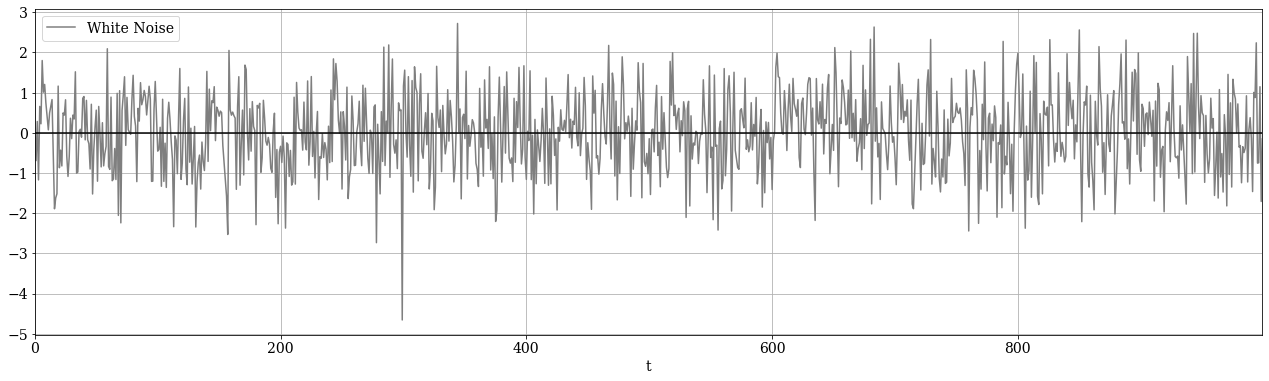

In [36]:
white_noise = np.random.normal(0, 1, size=1000)
plt.figure(figsize = (22,6))
plt.plot(white_noise, label = 'White Noise', color = 'tab:grey')
plt.legend(loc= 'best')
plt.axhline(0, color ='k')
plt.xlabel('t')
plt.autoscale(axis = 'x', tight = True)
plt.grid(True)

In [37]:
from statsmodels.tsa.stattools import acf, pacf

nlags = 30

In [38]:
def acf_pacf_plots(X, nlags):
    X_acf = acf(X, nlags=nlags, fft=True)
    X_pacf = pacf(X, nlags=nlags)
    ci1 = pci1 = 1.96 /np.sqrt(X.shape[0])
    ci2 = pci2=  - ci1
    
    plt.figure(figsize = (22,6))
    plt.subplot(1,2,1)
    plt.bar(range(len(X_acf)), X_acf)
    plt.title('Autocorrelation Function')
    plt.axhline(ci1, color = 'k', linestyle = 'dashed')
    plt.axhline(ci2, color = 'k', linestyle = 'dashed')
    plt.ylim(min(0, min(X_acf))-0.1, max(X_acf)+0.1)
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.bar(range(len(X_pacf)), X_pacf, color = 'tab:orange')
    plt.title('Partial Autocorrelation Funtion')
    plt.axhline(pci1, color = 'k', linestyle = 'dashed')
    plt.axhline(pci2, color = 'k', linestyle = 'dashed')
    plt.ylim(min(0, min(X_pacf))-0.1, max(X_pacf)+0.1)
    plt.grid(True)
    
    return

Testing for zero autocorrealtions has been used as a tool to check the efficient market assumption. However, the way by which stock prices are determined might introduce autocorrelations in the observed return series.

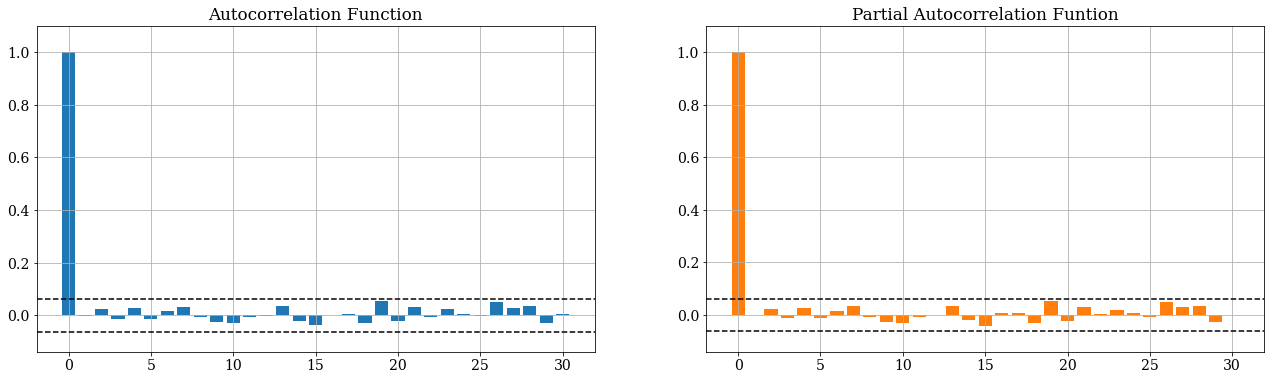

In [39]:
acf_pacf_plots(white_noise, nlags)

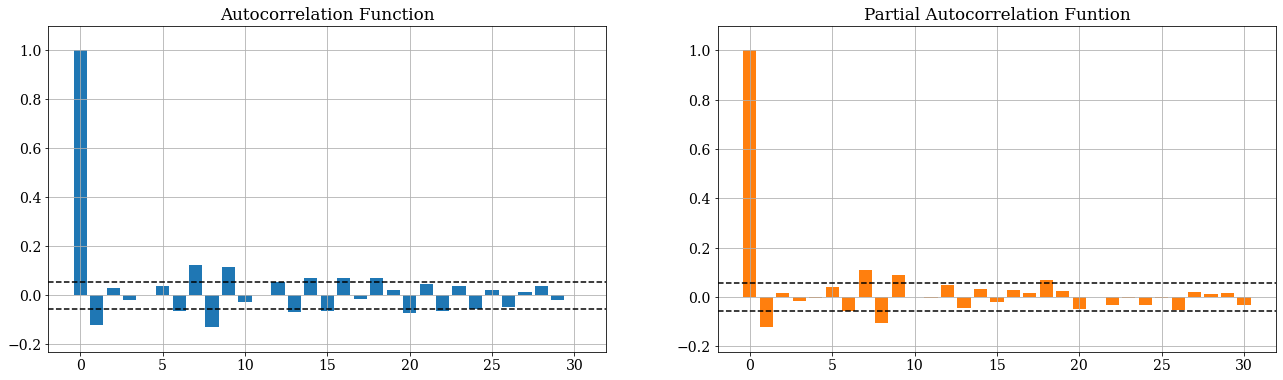

In [40]:
acf_pacf_plots(lr_apple, nlags)

The behavior of sample autocorrelations in the above example indicates that for some asset returns it is necessary to model the serial dependence before further analysis can be made. In what follows, we discuss some simple time series models that are useful in modeling the dynamic structure of a time series.

## Linear time series

---
A time series $r_t$ is said to be linear if it can be writen as:

$$r_t = \mu + \sum_{i=0}^\infty \psi_ia_{t-i}$$

where $\mu$ is the mean of $r_t$, $\psi_0 = 1$ and $\lbrace a_t \rbrace$ is a sequence of iid random variables with mean zero and a well-defined distribution (white noise). $a_t$ denotes the new information at time $t$ of the time series and is often referred or as the *innovation* or *shock* at time $t$.

The term **linear** refers to the linearity of the process on the errors.

## AR Models


An autoregressive, or $AR(p)$, model is created by regressing a time series on its past values, its lags. The simplest form of an autoregressive model is an $AR(1)$ model, signifying using only one lag term. A first order autocorrelation model like this for a time series $r_t$ is:

$$
r_t = \phi_0 + \phi_1 r_{t - 1} + \epsilon_t
$$

Where $r_{t - 1}$ represents the value of the time series at time $(t - 1)$ and $\epsilon_t$ is assumed to be a white noise series with mean zero and variance $\sigma^2_a$. 

An $AR(1)$ model implies that, conditional on the past return $r_{t-1}$, we have:

$$E(r_t|r_{t-1}) = \phi_0 + \phi_{1}r_{t-1}$$

$$Var(r_t|r_{t-1}) = Var(\epsilon_t) = \sigma^2_a$$

That is, given the past return $r_{t-1}$, the current return is centered around $\phi_0 + \phi_{1}r_{t-1}$. This is a Markov property such that conditional on $r_{t-1}$, the return $r_{t}$ is not correlated with $r_{t-i}$ for $i>1$.

Obviously, there are situations in which $r_{t-1}$ alone cannot determine the conditional expectation of $r_{t}$, and a more flexible model must be sought. 

The generalizaation of the $AR(1)$ model is the $AR(p)$ model:

$$
r_t = \phi_0 + \phi_1 r_{t - 1}+\dots  + \phi_p r_{t - p} + \epsilon_t
$$


### Properties of AR models
For effective use of $AR$ models, it is important to study their basic properties. We will study the $AR(1)$ and $AR(2)$ properties in detail and give the results for the general $AR(p)$ model.

### AR(1) model

Assuming that the $AR(1)$ series is weakly stationary, we have $E(r_t)=\mu$, $Var(r_t) = \gamma_0$ and $Cov(r_t, r_{t-j}) = \gamma_j$, where $\mu$ and $\gamma_0$ are constant and $\gamma_j$ is a function of $j$. 
Taking the expectation of the $AR(1)$ process, we obtain:

$$E(r_t) = \phi_0 + \phi_1E(r_{t-1})$$

Under the stationarity condition, $E(r_t) = E(r_{t-1}) = \mu$ and hence:

$$\mu = \phi_0 + \phi_1\mu$$
$$ E(r_t) = \mu = \dfrac{\phi_0}{1 - \phi_1}$$

This result has two implications for $r_t$. First, the mean of $r_t$ exists if $\phi_1 \neq 0$. Second, the mean of $r_t$ is zero is and only if $\phi_0 = 0$.
Thus, for a stationary $AR(1)$ process, the constant term $\phi_0$ is related to the mean of $r_t$ via $\phi_0 = (1 - \phi_1)\mu$ and $\phi_0 =0$ implies that $E(r_t) =0$.

Next, using $\phi_0 = (1 - \phi_1)\mu$, we can write

$$r_t - \mu = \phi_1(r_{t-1}-\mu)+\epsilon_t$$

and by repeated substitutions, we get

$$r_t - \mu = \epsilon_t + \phi_1a_{t-1}+\phi_1^2a_{t-2}+ \dots$$
$$r_t - \mu = \sum_{i=0}^\infty \phi_1^ia_{t-i} $$

This equation expresses an $AR(1)$ process in the form of a linear function of $a_{t-i}$ for $i\geq 1$. (This is the $MA(\infty)$ representation of an $AR(1)$ process)

Taking the square of $r_t$ and taking its expectation:

$$Var(r_t) = \phi_1^2Var(r_{t-1}) + \sigma^2_a$$

Which under the stationarity assumption ($Var(r_t) = Var(r_{t-1})$):

$$Var(r_t) = \dfrac{\sigma^2_a}{1-\phi_1^2}$$

For the variance to be bounded and nonnegative, it is required that $-1 \leq \phi^2_1 \leq 1$.

This condition ensures that the mean and variance of $r_t$ are finite and time invariante. Therefore, the $AR(1)$ model is weakly stationary.

**The necessary and sufficient condition for the $AR(1)$ model to be weakly stationary is $|\phi_1<1|$**


### AR(2) model

An $AR(2)$ model assumes the form

$$r_t = \phi_0 + \phi_1r_{t-1} + \phi_2r_{t-2} + \epsilon_t$$

Using the same techniques as that of the $AR(1)$, we can obtain:

$$E(r_t) = \mu = \dfrac{\phi_0}{1- \phi_1 - \phi_2}$$

With $\phi_1 + \phi_2 \neq 0$. Using $\phi_0 = \mu (1- \phi_1 - \phi_2)$ we can write:

$$(r_t - \mu) = \phi_1(r_{t-1}-\mu) + \phi_2(r_{t-2}-\mu) +\epsilon_t$$

Multiplying by $(r_{t-l} - \mu)$:

$$(r_{t-l} - \mu)(r_t - \mu) = \phi_1(r_{t-l} - \mu)(r_{t-1}-\mu) + \phi_2(r_{t-l} - \mu)(r_{t-2}-\mu) +(r_{t-l} - \mu)\epsilon_t$$

Taking expectation and knowing that $E[(r_{t-l} - \mu)\epsilon_t] = 0 $ (since $(r_{t-l} - \mu)$ is a linear function of $a_{t-l-k}$ and the series $\lbrace \epsilon_t \rbrace$ are independent), we obtain:

$$\gamma_l = \phi_1\gamma_{l-1} + \phi_2\gamma_{l-2}$$

Which is known as the *moment equation* of a stationary $AR(2)$ model. Dividing by $\gamma_0$:

$$\rho_l = \phi_1\rho_{l-1} + \phi_2\rho_{l-2}$$ for $l \geq 2$

Since

$$\rho_0 = 1$$
$$\rho_1 = \dfrac{\phi_1}{1 - \phi_2}$$

This equation says that the ACF of a stationary $AR(2)$ series satisfy the second-order difference equation:

$$(1 - \phi_1L + \phi_2L^2)\rho_l = 0$$

where $L$ is called the *lag-shift* operatior such that $L^j\rho_l = \rho_{l-j}$.
This difference equation determines the properties of the ACF of a stationary AR(2) time series.

We can express the characteristic equation as:

$$1- \phi_1x - \phi_2x^2 $$

The inverse of the solutions of this equation are called **characteristic roots**.

**The stationaty condition of an AR(2) process is that the absolute value of its two characteristic roots are less than 1**. Such condition ensures that the ACF of the model converges to 0 as the lag $l$ increases, which is a necessary condition for a stationary time series.

Note that the condition for the $AR(1)$ process is the same, with a polynomial equation of $1-\phi_1x = 0$ and a chatacteristic root of $\phi_1$.

### AR(p) model

$$E(r_t) = \dfrac{\phi_0}{1- \phi_1- \dots - \phi_p}$$

with $\phi_1+ \dots + \phi_p \neq 0$

The associated characteristic equation of the model is:

$$1- \phi_1x - \phi_2x^2 - \dots - \phi_px^p $$

**An $AR(p)$ model is stationaty if all the solutions of  characteristic roots less than 1 in modulus (holds if the roots are complex)**

## Identifying AR models in practice

In application, the order $p$ of an $AR$ process is unknown and it must be specified empirically. 
Two general approaches are available for determining the value of $p$. The first approach is to use the **partial autocorrelation function (PACF)** and the other one uses some **information criteria**.

### 1) Partial Autocorrelation Function

The **PACF** explains the partial correlation between the series and lags of itself. A simple wat to introduce PACF is to consider the following AR models in consecutive orders:

$$r_t = \phi_{0,1} + \phi_{1,1}r_{t-1} + e_{1t}$$

$$r_t = \phi_{0,2} + \phi_{1,2}r_{t-1} +\phi_{2,2}r_{t-2}+ e_{2t}$$

$$r_t = \phi_{0,3} + \phi_{1,3}r_{t-1} +\phi_{2,3}r_{t-2} +\phi_{3,3}r_{t-3}+ e_{3t}$$
$$.$$
$$.$$
$$.$$


These models are in the form of a multiple linear regression and can be estimated by OLS. The estimates of $\phi_{1,1}$ is called the lag-1 sample PACF of $r_t$. The estimate of $\phi_{2,2}$ is the lag-2 PACF, the estimate $\phi_{3,3}$ the lag-3, and so on so forth.

The lag-2 PACF shows the added contribution of $r_{t-2}$ to $r_t$ over the $AR(1)$ model. The lag-3 PACF shows the added contribution of $r_{t-3}$ to $r_t$ over the $AR(2)$ model, and so on.

Therefore, for an $AR(p)$ model, the lag-p PACF should not be zero, but the lag-j PACF for $j>p$ should be close to zero.

**For an $AR(p)$ model, the sample PACF cuts off at lag p.**

### Simulating Data

Here we will draw data samples from a simulated $AR(2)$ process.

In [41]:
b = np.array([0.3, 0.5, 0.2])

def AR_process(b, X, mu, sigma):
    l = min(len(b)-1, len(X))
    b0 = b[0]
    
    return b0 + np.dot(b[1:l+1], X[-l:]) + np.random.normal(mu, sigma)

def simulate_AR(b):
    X = np.array([1])
    mu = 0
    sigma = 1 
    for i in range(1000):
        X = np.append(X, AR_process(b, X, mu, sigma))
    
        X = pd.Series(X, name = 'X')
        
    return X
    
AR = simulate_AR(b)

p = len(b)-1
print('p = '+ str(p))

p = 2


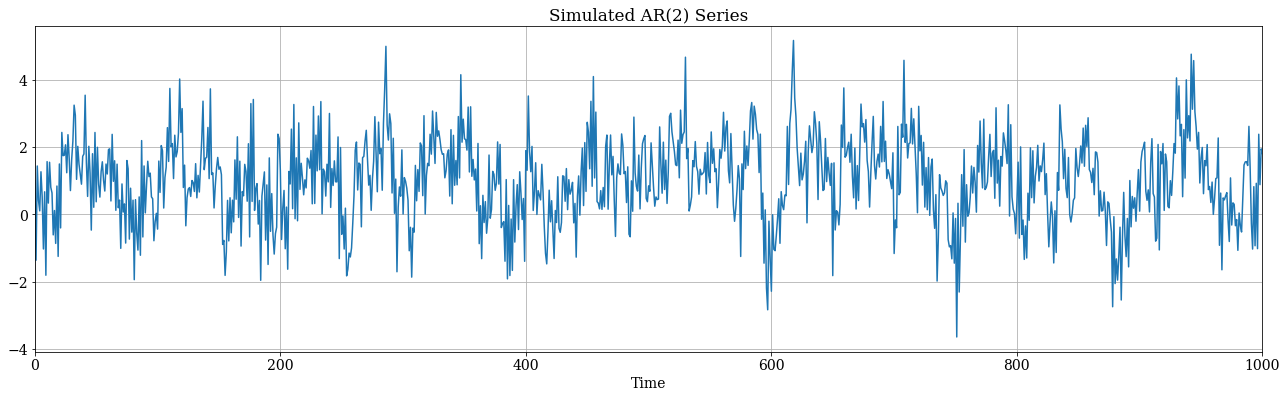

In [42]:
fig = plt.figure(figsize = (22,6))
plt.plot(AR)
plt.autoscale(axis = 'x', tight = True)
plt.xlabel('Time')
plt.title('Simulated AR('+str(p)+') Series')
plt.grid(True)

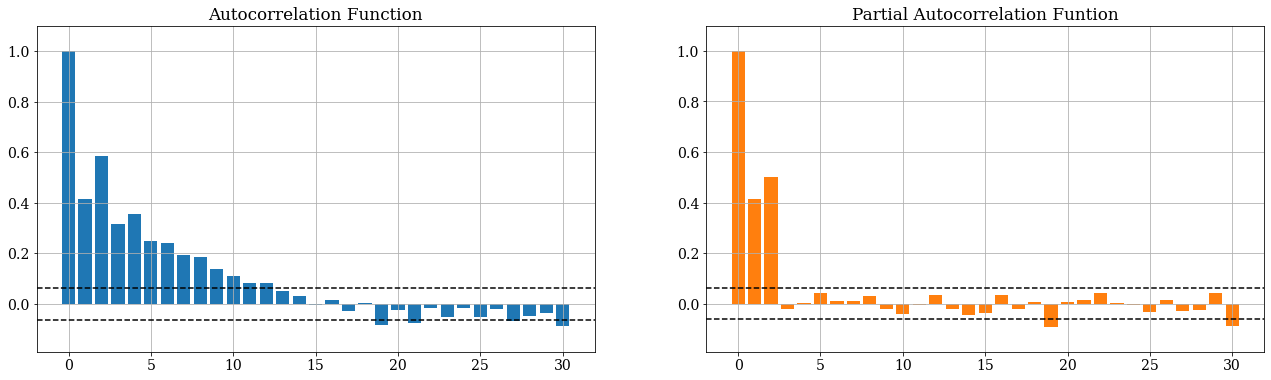

In [43]:
acf_pacf_plots(AR, nlags)

### Information Criteria

#### 1. Akaike information criterion (AIC)

$$AIC = 2k - 2ln(\hat{L})$$

where k is the numer of parameters of the model and $\hat{L}$ is the maximum value of the likelihood function for the model

The first term measures the goodness of fit of the $AR(p)$ model to the data, whereas the second term is called the *penalty function* because it penalizes a candidate model by the number of parameter used.

#### 2. Schwarz-Bayesian information criterion (BIC)

$$BIC = ln(T)k - 2 ln(\hat{L})$$

The penalty for each parameter used is 2 for AIC and $ln(T)$ for BIC. Bic tends to select a lower AR model when the sample size is moderate or large.

#### Selection rule

Compute the AIC and BIC for all models we wish to consider (that is, $AR(1),\dots, AR(P)$), and note the smallest $AIC$ and $BIC$ recorded  $AIC_{min}$  and  $BIC_{min}$ . The number of parameters $k$ used to compute $AIC_{min}$  and  $BIC_{min}$ minimize information loss under each metric.

For each type of IC we then can compute the *relative likelihood* of each model  *i*  by taking

$$l=\exp{\dfrac{(IC_{min}−IC_i)}{2}}$$
 
We can interpret  $l$  as model  $i$  is  $l$  times as likely to minimize information loss, compared to the minimum AIC model.

In [44]:
import statsmodels.tsa as tsa
from statsmodels.tsa.ar_model import AutoReg

AutoReg receives as input the time serie X and the numer of lags, and return the estimated model. This will allow as to compute the information criteria.

In [45]:
N = 10
AIC = np.zeros((N, 1))

for i in range(N):
    model = AutoReg(AR, i+1)
    model = model.fit()
    AIC[i] = model.aic
    
AIC_min = np.min(AIC)
model_min = np.argmin(AIC)

print('Relative Likelihoods')
print(' ')
print(np.exp((AIC_min-AIC) / 2))
print(43*'.')

print('Number of parameters in minimum AIC model %s' % (model_min+1))

Relative Likelihoods
 
[[0.86382663]
 [1.        ]
 [0.99918642]
 [0.99781019]
 [0.9976933 ]
 [0.99651367]
 [0.99506908]
 [0.99645806]
 [0.99527946]
 [0.99603649]]
...........................................
Number of parameters in minimum AIC model 2


In [46]:
N = 10
BIC = np.zeros((N, 1))

for i in range(N):
    model = AutoReg(AR, i+1)
    model = model.fit()
    BIC[i] = model.bic
    
BIC_min = np.min(BIC)
model_min = np.argmin(BIC)

print('Relative Likelihoods')
print(' ')
print(np.exp((BIC_min-BIC) / 2))
print(43*'.')

print('Number of parameters in minimum BIC model %s' % (model_min+1))

Relative Likelihoods
 
[[0.86595573]
 [1.        ]
 [0.99672583]
 [0.99289793]
 [0.99032899]
 [0.98671049]
 [0.98283823]
 [0.98176699]
 [0.97816766]
 [0.97647388]]
...........................................
Number of parameters in minimum BIC model 2


In this case, both methods indicates to choose 2 lags. If one of them were to indicate more, we should choose the minimum number of lags.

### Parameter estimation

In [47]:
model = AutoReg(AR, 2)
model = model.fit()

In [48]:
print('Intercept: '+ str(b[0]))
print('B1:        '+ str(b[2]))
print('B2:        '+ str(b[1]))

Intercept: 0.3
B1:        0.2
B2:        0.5


In [49]:
print('The estimates are:')
model.params

The estimates are:


intercept    0.302656
X.L1         0.205989
X.L2         0.501881
dtype: float64

### Model checking
If the model is adequate, then the residual series should behave as a white noise. This means that there are no autocorrelation between the residual and its past values. To check that, we can perform the Ljung-Box test. Recall that $H_0: \rho_1 = \dots= \rho_m = 0$ against $H_a: \rho_i \neq 0$ for some $i \in \lbrace 1, \dots, m\rbrace$. 

In [50]:
residuals= model.resid

Text(0.5, 1.0, 'Residual Series')

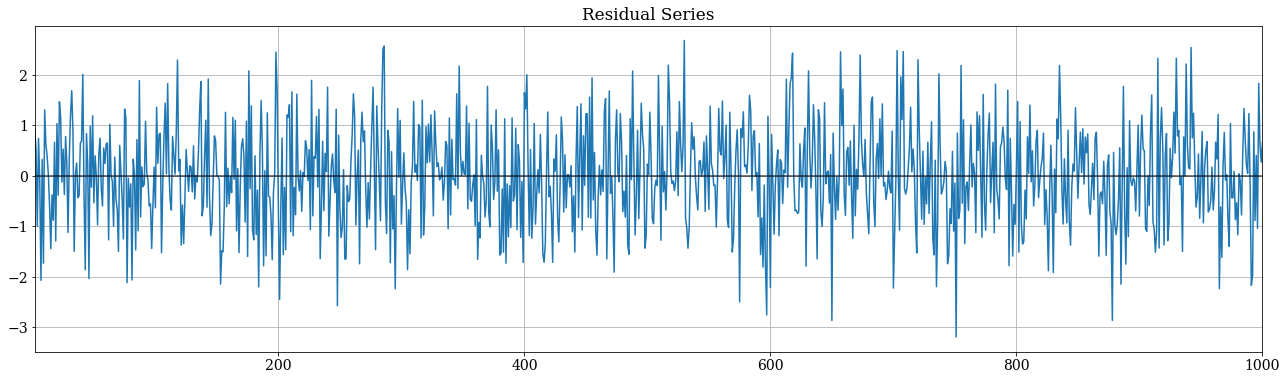

In [51]:
plt.figure(figsize = (22,6))
plt.plot(residuals)
plt.axhline(residuals.mean(), color = 'k', alpha = .7)
plt.autoscale(axis = 'x', tight = True)
plt.grid(True)

plt.title('Residual Series')

In [52]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [124]:
lbt = acorr_ljungbox(residuals, lags= 10, return_df=False)

print('  Q      p-value   reject H0')
for i, j in zip(lbt[0], lbt[1]):
    if j>0.05:
        reject = 'False'
    else:
        reject = 'True'
    print ('%5.3f  %8.3f' '%12s' % (i, j, reject))

  Q      p-value   reject H0
0.171     0.679       False
0.224     0.894       False
1.608     0.658       False
1.816     0.770       False
1.913     0.861       False
2.234     0.897       False
2.639     0.916       False
5.108     0.746       False
5.331     0.805       False
6.212     0.797       False


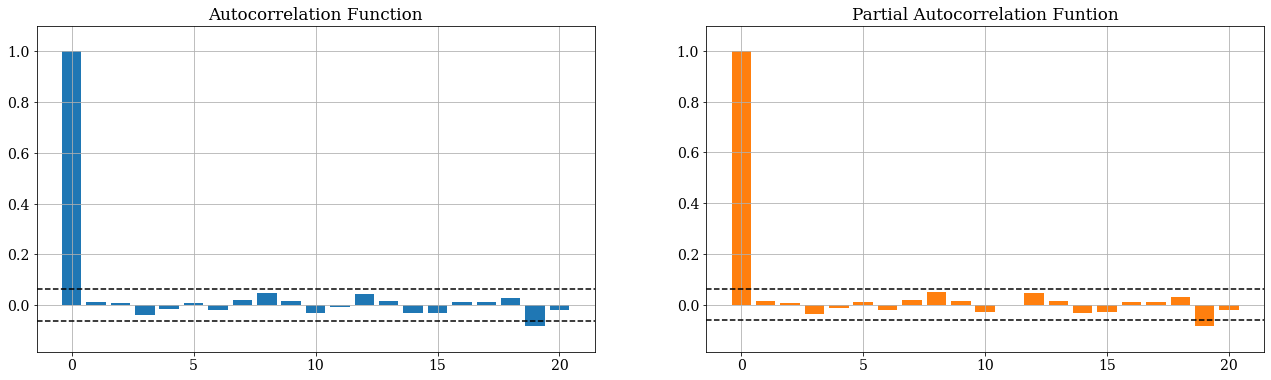

In [125]:
acf_pacf_plots(residuals, 20)

## MA models

We now turn to another class of simple models that are also useful in modeling return series in finance. These models are called **moving-average (MA)** models. 

Let $\lbrace\epsilon_t\rbrace$ be a white noise time series. The general form for a $MA(q)$ model is:

$$r_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q}$$

Where $\mu$ is the mean of the serie and $\theta_i$ are the parameters of the model.

This model can also be writen with the lag operator as:

$$r_t = \mu + (1 + L + L^2 + \dots + L^q)\epsilon_t$$

Thus, a moving-average model is conceptually a linear regression of the current value of the series against current and previous (observed) white noise error terms or random shocks.


### Properties of MA models

#### Stationarity

MA models are always weakly stationary because they are finite linear combina-tions of a white noise sequence for which the first two moments are time-invariant.
The expecation of the model is:

$$E(r_t) = \mu$$

And the variance:

$$Var(r_t) = (1 +\theta_1^2 +\theta_2^2+ \dots +\theta_q^2)\sigma_\epsilon^2$$

Which are both time invariant.

#### Invertibility
Rewriting a zero-mean MA(1) model as $\epsilon_{t} = r_t + \theta\epsilon_{t-1}$, one can use repeated substitutions to obtain

$$\epsilon_t = r_t + \theta_1 r_{t-1} + \theta_1^2 r_{t-2} + \dots $$

This equation expresses the current shock $\epsilon_t$ as a linear combination of the present and past returns. Intuitively, $\theta_1^j$ shoul go to zero as $j$ increases because the remote return $r_{t-j}$ should have very little impact on the current shock, if any. Consequently, for a $MA(1)$ to be plausible, we require that $|\theta_1<1|$. Such $MA(1)$ model is said to be invertible.

### Identifying MA Order

The ACF is useful in identifying the order of a MA model. FOr a time series $r_t$ whit ACF $\rho_k$, if $\rho_q \neq 0$ but $\rho_k = 0$ for $k>q$, then $r_t$ follows an $MA(q)$ model.

### Simulating Data

Here we will draw data samples from a simulated $MA(2)$ process.

In [55]:
g = np.array([0.5, 0.6])

def simulate_MA(g):
    e = np.random.normal(0, 1, 1000)
    X = np.zeros(1000)
    mu = 1
    for t in range(len(g), len(e)-len(g)):
        X[t]= mu + e[t] + np.dot(g, e[t-len(g):t])
        
    return X

q= len(g)-1
print('q = '+str(q))

q = 1


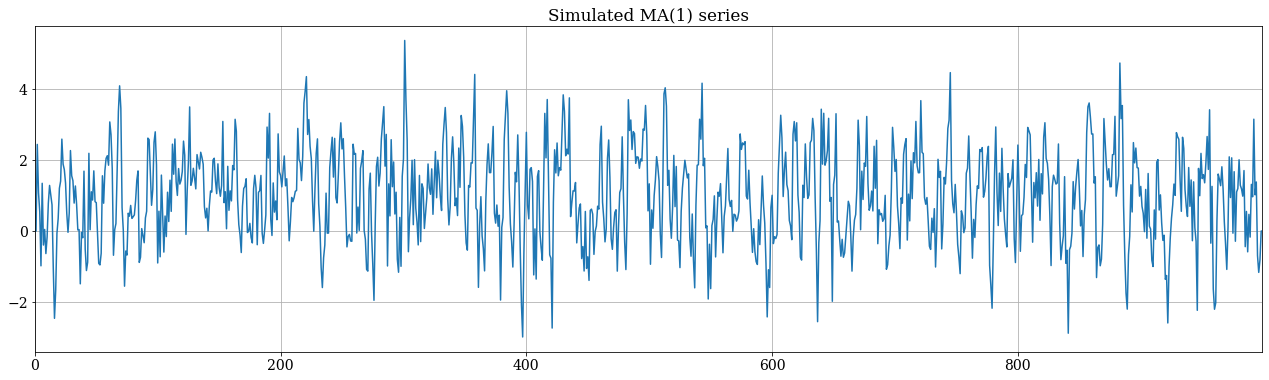

In [56]:
MA = simulate_MA(g)
plt.figure(figsize = (22,6))

plt.plot(MA)
plt.title('Simulated MA('+str(q)+') series')
plt.autoscale(axis = 'x', tight = True)
plt.grid(True)

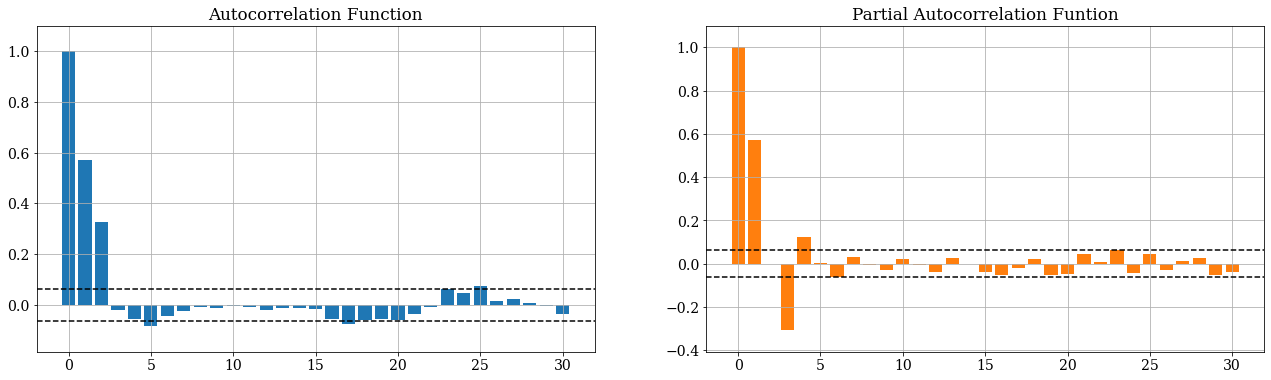

In [57]:
acf_pacf_plots(MA, nlags)

## SUMMARY
---
- For MA models, ACF is useful in specifying the order, because ACF cuts off at lag q for a $MA(q)$ series.
- For AR models, PACF is useful in specifying the order, because PACF cuts off at lag p for a $AR(p)$ series.
- A MA series is always stationary, but for an AR series to be stationary, all of its characteristic roots must be less than 1 in modulus.

## ARMA models

The autoregressive moving-average (ARMA) models combines the ideas of AR and MA models into a compact form so that the number of parameters used is kepts small, achieving parsimony in parametrization. For return series in finance, the chance of using ARMA models is low. However, the concept of ARMA models is highly relevant in volatility modeling. 
We denote $ARMA(p,q)$ where $p$ is the lag of the autoregressive component and $q$ is the lag of the moving average component.


### ARMA(1,1)

A time series $r_t$ follows an $ARMA(1,1)$ model if it satisfies

$$r_t - \phi r_{t-1} = \phi_0 + \epsilon_t + \theta_1 \epsilon_{t-1}$$

where $\lbrace \epsilon_t \rbrace$ is a white noise series. The left-hand side is the AR component and the right-hand side is the MA component.

### ARMA (p,q)

A general $ARMA(p,q)$ model is in the form

$$r_t = \phi_0 + \sum_{i=1}^p\phi_ir_{t-i} + \sum_{i=1}^q \theta_i\epsilon_{t-i} + \epsilon_t$$ 

Using the lag-operator, we can write

$$(1- \phi_1L - \phi_2L^2 - \dots - \phi_pL^p)r_t = \phi_0 + (1 + \theta_1L + +\theta_2L^2 + \dots + \theta_qL^q)\epsilon_t$$

The AR polinomial introduces the characteristic equation of an ARMA model. **If all of the solutions of the characteristic equation are less than 1 in absolute value, then the ARMA model is weakly stationary.**


### ACF and PACF

The ACF and PACF are not informative in determining the order of an ARMA model. 

In [58]:
def simulate_ARMA(b,g):
    e = np.random.normal(0, 1, 1000)
    X = np.array([1])
    b0 = b[0]
    mu = 1
    l = min(len(b)-1, len(X))
    for t in range(len(g), len(e)-len(g)):
        X = np.append(X, b0 + np.dot(b[1:l+1], X[-l:]) + mu + e[t] + np.dot(g, e[t-len(g):t]))
    return X

In [59]:
b = np.array([0.5, 0.9])
g = np.array([0.8])

ARMA = simulate_ARMA(b, g)

print('ARMA('+str(len(b)-1)+','+str(len(g))+')')

ARMA(1,1)


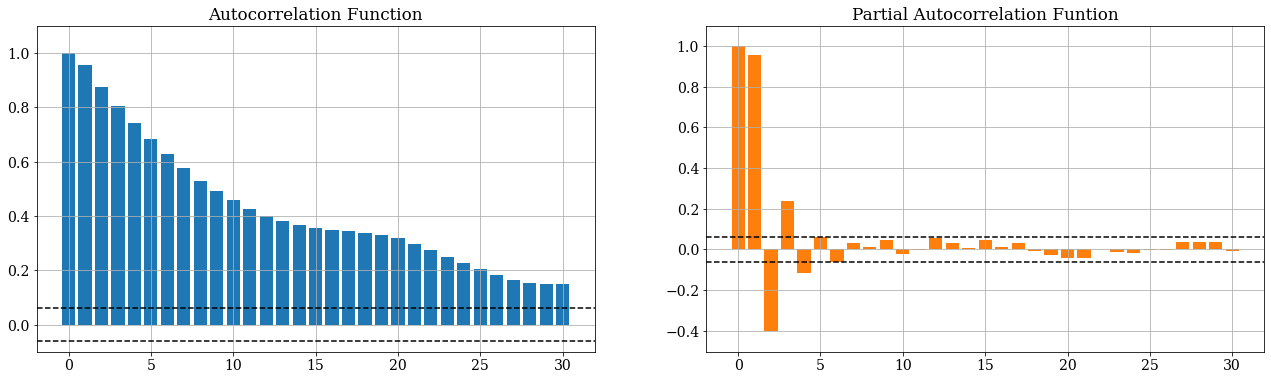

In [60]:
acf_pacf_plots(ARMA, 30)

## Unit-root nonstationarity

So far we have focused on series that are stationary. In finance, series like interest rates, exchange rates, or prices of an assets tend to be nonstationary. Nonstationary series are said to have a unit-root.

The best known example of unit-root nonstationary time series is the random-walk model.

### Random walk

A time series $\lbrace p_t \rbrace$ is a random walk if it satisfies:

$$p_t = p_{t-1}+ \epsilon_t$$

Where $\lbrace\epsilon_t\rbrace$ is white noise.
If $p_t$ has a simmetric distribution around zero, then $p_t$ has a 50-50 chance to go up or down. If we treat the random-walk model as a special $AR(1)$ model, then the coefficient of $p_{t-1}$ is 1, which does not satisfy the stationarity condition.

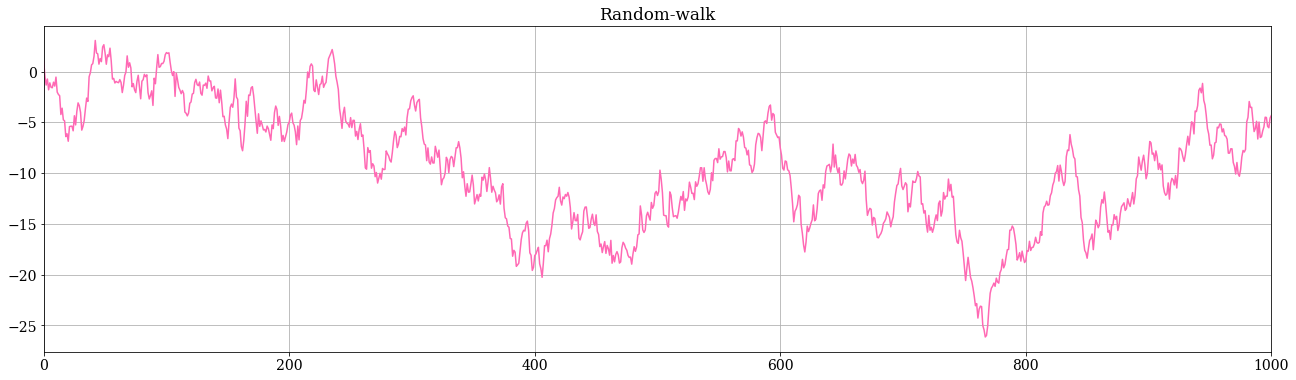

In [61]:
b = np.array([0, 1])
RW = simulate_AR(b)

plt.figure(figsize = (22,6))
plt.plot(RW, color = 'hotpink')
plt.title('Random-walk')
plt.autoscale(axis = 'x', tight = True)
plt.grid(True)

The random-walk model has widely been considered as a statistical model for the movement of logged stock prices. Under such model, the stock price is not predictable or mean reverting.

The MA representation of the random-walk model is:

$$p_t = \epsilon_t + \epsilon_{t-1}+ \epsilon_{t-2}+\dots$$

Which shows that the impact of shock $\epsilon_{t-i}$ on $p_t$ does not decay over time. Consequently, the series has a strong memory as it remembers all the past shocks. This can also be seen in the ACF, there all sample ACFs are approach to 1.

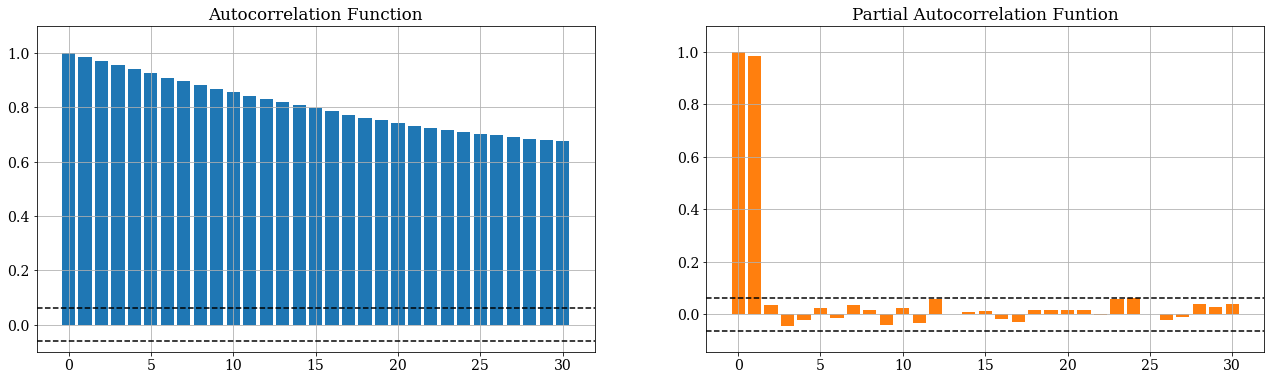

In [62]:
acf_pacf_plots(RW, 30)

## Random-walk with a drift

The log return series tend to have a small and positive mean. This implies that

$$p_t = \mu + p_{t-1} + \epsilon_t$$

where $\mu = E(p_t - p_{t-1})$

The constant term of the model is very important in finance, since it represents the time trend of the log price $p_t$. It is ofter referred to as the *drift* of the model.

This is because:

$$p_t = t\mu + p_0 + \epsilon_1 + \epsilon_2 + \dots + \epsilon_t$$

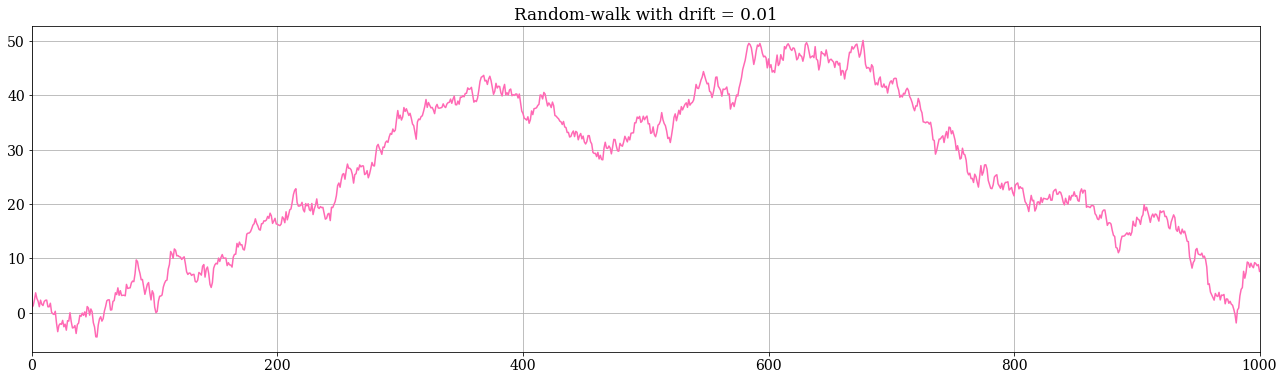

In [63]:
drift = 0.01

b = np.array([drift, 1])
RW = simulate_AR(b)

plt.figure(figsize = (22,6))
plt.plot(RW, color = 'hotpink')
plt.title('Random-walk with drift = '+str(drift))
plt.autoscale(axis = 'x', tight = True)
plt.grid(True)

## ARIMA

If one extends the ARMA model by allowing the AR polynomial to have 1 as a characteristic root, then the model becomes an **Autoregressive Integrated Moving-Average (ARIMA)**.

The conventional approach for handling unit-root nonstationarity is to use *differencing*.

#### Diferencing
A time series $y_t$ is said to be an $ARIMA(p,1,q)$ process if the change series $\triangle y_t = y_t - y_{t-1} = (1-L)y_t$ follows a stationary and invertible ARMA(p,q) model. 

The log-prices series $ln(P_t)$ are unit-root and hence can be treated as ARIMA process, because the return series $r_t = ln(P_t) - ln(P_{t-1})$ are stationary. $r_t = ln(P_t) - ln(P_{t-1})$ is referred to as the first differenced series of $P_t$. 

If a process needs to be differenciated $d$ times in order to be a stationary $ARMA(p,q)$, then the process is referred to as an $ARIMA(p,d,q)$


## Model building

If the ACF and PACF functions does not reveal the order os the ARMA(p,q) model, how should we proceed?

- Add either AR or MA
- Increase model complexity when statistically different using test size 𝛼≤5%
- Stop when no excluded lag is significant
- Use information criteria

Let's import the S&P500 data and see if we can fit an ARIMA model.

In [64]:
SP500 = yf.download('^GSPC', period='20y')['Adj Close']
SP500 = np.log(SP500)
SP500.name = 'S&P 500'

[*********************100%***********************]  1 of 1 completed


First, let's see if our data is stationary and, if not, what is the order of integration.

In [65]:
check_for_stationarity(SP500)

p-value = 0.9843 The series S&P 500 is likely non-stationary.


In [66]:
first_dif = (SP500 - SP500.shift(1)).dropna()
first_dif.name = 'S&P 500 1st diff'

In [67]:
check_for_stationarity(first_dif)

p-value = 0.0 The series S&P 500 1st diff is likely stationary.


Another way to get the order of integration:

In [68]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [69]:
from pmdarima.arima.utils import ndiffs

ndiffs(SP500)

1

The first thing we know is that $d = 1$. We have that $ARIMA(p,1,q)$.

Now we need to find $p$ and $q$.
Let's first look at the ACF and PACF to see if we can get a pattern.

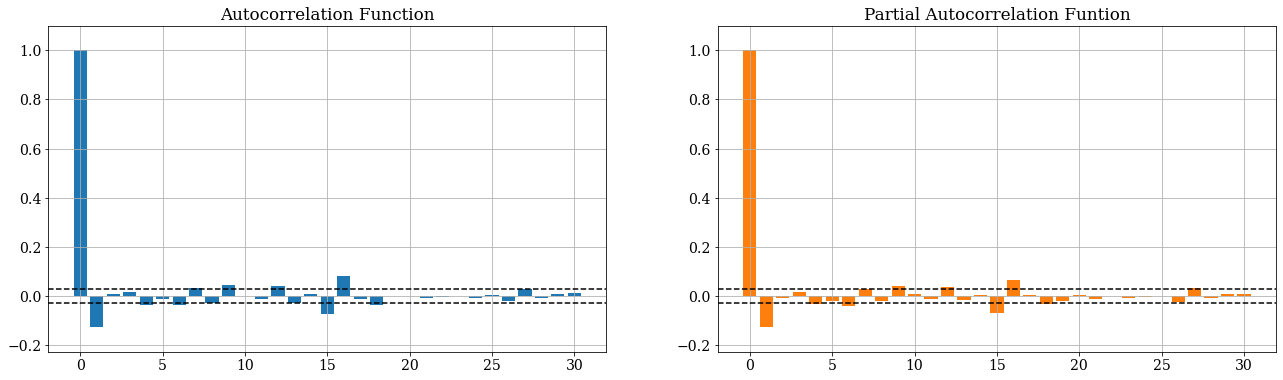

In [70]:
acf_pacf_plots(first_dif,30)

If the ACF and PACF do not provide useful information, we can proceed to estimate different models and see 

In [71]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,0 ARIMA Model
model = ARIMA(SP500.values, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 5035
Model:                 ARIMA(1, 1, 0)   Log Likelihood               15062.953
Method:                       css-mle   S.D. of innovations              0.012
Date:                Tue, 01 Feb 2022   AIC                         -30119.905
Time:                        13:04:23   BIC                         -30100.333
Sample:                             1   HQIC                        -30113.048
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.822      0.068   -2.09e-05       0.001
ar.L1.D.y     -0.1265      0.014     -9.049      0.000      -0.154      -0.099
                                    Roots           

In [72]:
# 1,1,1 ARIMA Model
model = ARIMA(SP500.values, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 5035
Model:                 ARIMA(1, 1, 1)   Log Likelihood               15063.066
Method:                       css-mle   S.D. of innovations              0.012
Date:                Tue, 01 Feb 2022   AIC                         -30118.132
Time:                        13:04:24   BIC                         -30092.035
Sample:                             1   HQIC                        -30108.989
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.834      0.067    -1.9e-05       0.001
ar.L1.D.y     -0.0797      0.101     -0.788      0.431      -0.278       0.119
ma.L1.D.y     -0.0477      0.101     -0.471      0.6

In [73]:
# 1,1,1 ARIMA Model
model = ARIMA(SP500.values, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 5035
Model:                 ARIMA(2, 1, 1)   Log Likelihood               15066.001
Method:                       css-mle   S.D. of innovations              0.012
Date:                Tue, 01 Feb 2022   AIC                         -30122.002
Time:                        13:04:25   BIC                         -30089.382
Sample:                             1   HQIC                        -30110.573
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.845      0.065   -1.72e-05       0.001
ar.L1.D.y     -0.9061      0.080    -11.384      0.000      -1.062      -0.750
ar.L2.D.y     -0.1202      0.015     -7.772      0.0

If we add any more lags for the AR or MA component, those lags are not significant. We can therefore keep this last model, that is $ARIMA(2,1,2)$.
Now let's check that the residuals are white noise.

In [74]:
resid = model_fit.resid

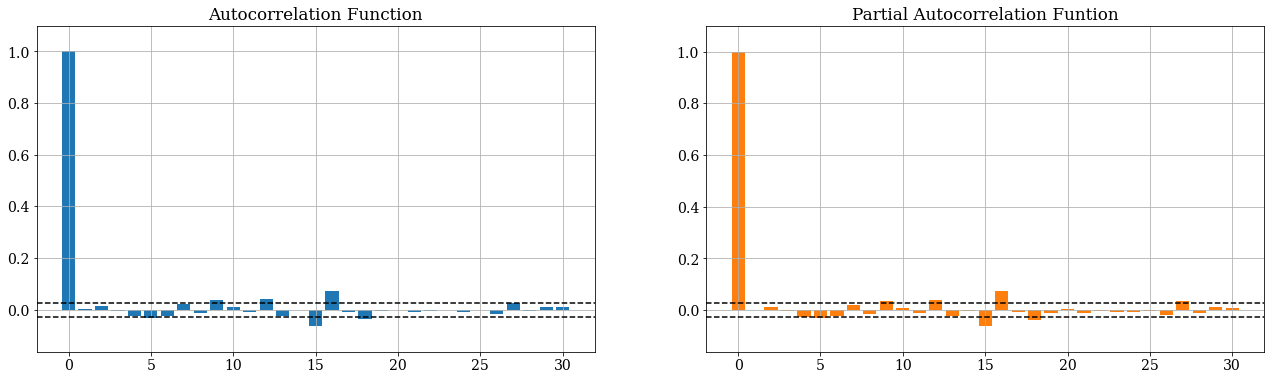

In [75]:
acf_pacf_plots(resid, 30)

In [76]:
resid = pd.Series(resid)
resid.name = 'Residuals'
check_for_stationarity(resid)

p-value = 0.0 The series Residuals is likely stationary.


Text(0.5, 1.0, 'Model residuals')

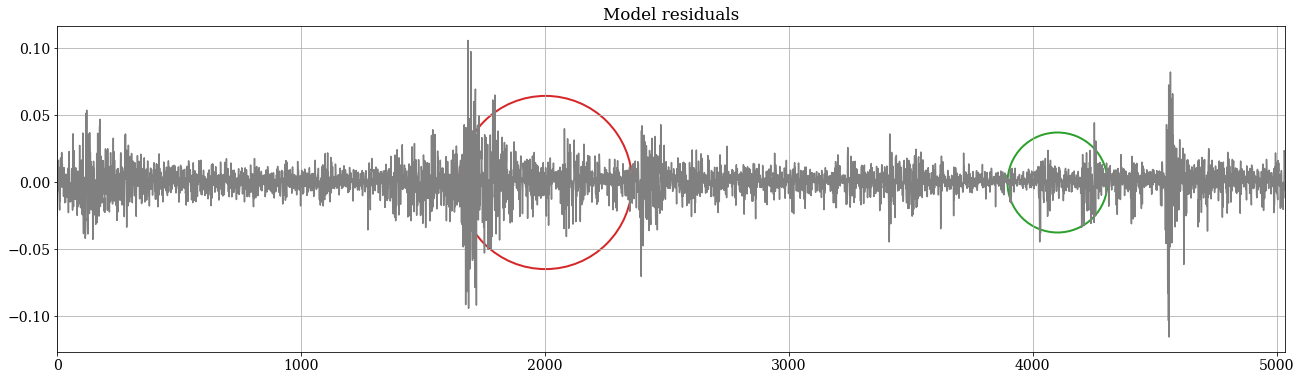

In [77]:
plt.figure(figsize = (22,6))
plt.plot(resid, color = 'grey')
plt.grid(True)
plt.autoscale(axis = 'x', tight = True)
plt.scatter(4100, 0, marker = 'o', s = 10000, color = 'white', edgecolor= 'tab:green', linewidths = 2)
plt.scatter(2000, 0, marker = 'o', s = 30000, color = 'white', edgecolor= 'tab:red', linewidths = 2)
plt.title('Model residuals')

If we plot the residuals of the model, we can note that its variance is not constant. There are some periods for which volatility is very low (such as at the green circle) , but others in which it is much higher (such as at the red circle). 

We will study how to model this kind of behavior of residuals when we introduce **Conditional Heteroscedastic Models** (**ARCH**, **GARCH**, etc.).

For now, we will just ignore that heteroscedastic behavior and try to use our model for forecasting.

## Forecasting

Text(0.5, 1.0, 'S&P 500 forecasting with an ARIMA(2,1,1) model')

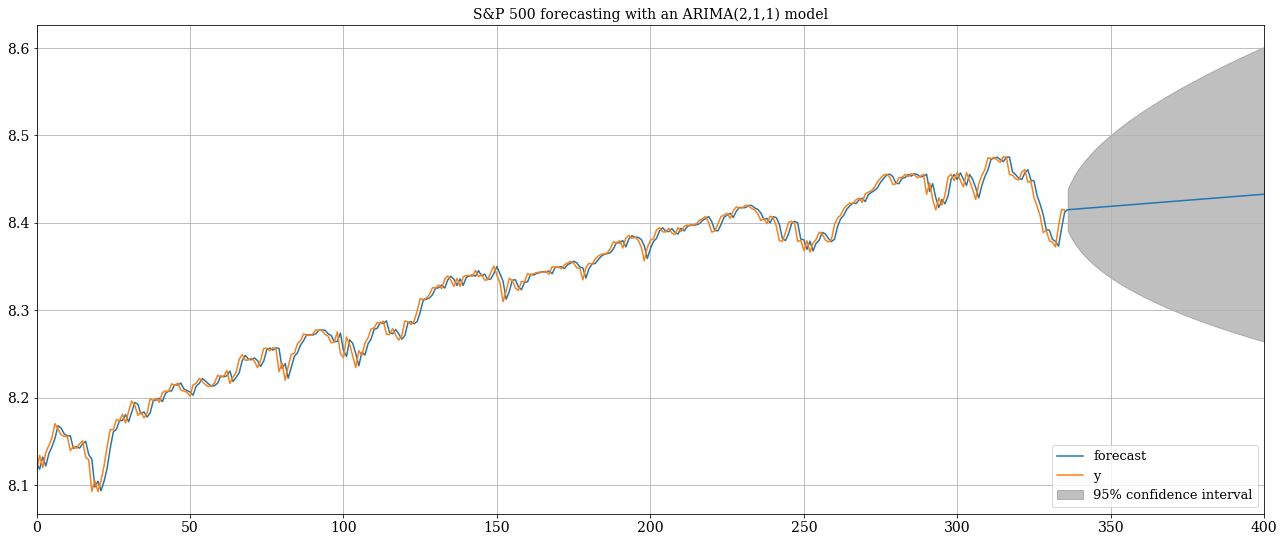

In [78]:
fig, ax = plt.subplots(figsize = (22,9))
model_fit.plot_predict(start = 4700, end = 5100, dynamic=False, ax=ax)
plt.grid(True)
plt.autoscale(axis = 'x', tight = True)
plt.legend(loc = 'lower right', fontsize = 13)
plt.title('S&P 500 forecasting with an ARIMA(2,1,1) model', fontsize = 14)

## $\color{red}{\text{AGREGAR SARIMA}}$

# Conditional Heteroscedastic Models
---

Conditional heteroscedastic models are econometric tools for modeling volatility. Volatility is an critical factor in finance. Although volatility is not directly observable, it has some characteristic that are commonly seen in asset returns: 

1. There exist volatility clusters (i.e., volatility may be high for certain periods and low for other periods). 
2. Volatility evolves over time in a continuous manner - that is, volatility jumps are rare. 
3. Volatility does not diverge to infinity - that is, it varies within some fixed range. This means that volatility is often stationary.
4. Volatility seems to react differently to a big price increase or a big price drop, referred to as the *leverage effect*. 

These properties play an important role in the development of volatility models. 

Going back to the $ARIMA(2,1,2)$ model we estimated, we saw that the residuals did not look very homoscedastic. The purpose of this section is to model that kind of behavior.


### Structure of the model
To put the volatility models in proper perspective it is informative to consider the conditional mean and variance of $r_t$ given $F_{t-1}$:

$$\mu_t = E(r_t|F_{t-1})$$
$$\sigma_t^2 = Var(r_t|F_{t-1}) = E[(r_t - \mu_t)^2|F_{t-1}]$$

where $F_{t-1}$ denotes the information set available at time $t-1$ (tipically a linear combination of the past returns).

We can therefore express the model as

$$r_t = \mu_t + \epsilon_t$$


Where, for instance:

$$\mu_t = \sum_{i=1}^p\phi_ir_{t-i} + \sum_{i=1}^p\theta_i\epsilon_{t-i}$$ 

if the model is an ARMA process, and

$$\sigma_t^2 = Var(r_t|F_{t-1}) = Var(\epsilon_t|F_{t-1})$$

The conditional heteroscedastic models are concerned with the evolution of $\sigma_t^2$. The manner in which $\sigma_t^2$ evolves over time distinguishes one volatility model from another.


### Model building

Building a volatility model for an asset return series consists of four steps:

1. Specify a mean equation by testing for serial dependence in the data and, if necessary, building an econometric model (such an ARMA model).
2. Use the residuals of the mean equation to test for ARCH effects (we will study ARCH models below).
3. Specify a volatility model if ARCH effects are statistically significant, and perform a joint estimation of the mean and volatility equations.
4. Check the fitted model and refine if necessary.



## ARCH models

The first model that provides a systematic framework for volatility modeling is the ARCH model of Engle (1982). The basic idea of ARCH models is that (a) the shock $\epsilon_t$ of an asset return is serially uncorrelated, but dependent, and (b) the dependence of $\epsilon_t$ can be describer by a simple quadratic function of its lagged values. Specifically, an $ARCH(m)$ model assumes that:

$$\epsilon = \sigma_tz_t$$

$$\sigma_t^2 = \omega + \alpha_1 \epsilon_{t-1}^2 + \dots + \alpha_m\epsilon_{t-m}^2$$

Where $z_t$ is a sequence of white noise, $\omega > 0$ and $\alpha_i \geq 0$ fot $i>0$.

From the structure of the model, it is seen that large past squared shocks $\lbrace\epsilon_{t-i}^2 \rbrace_{i=1}^m$ imply a large conditional variance $\sigma_t^2$ for the innovation $\epsilon_t$.

## ARCH (1)

$$\epsilon = \sigma_tz_t$$

$$\sigma_t^2 = \omega + \alpha_1 \epsilon_{t-1}^2 $$

The unconditional mean of $\epsilon_t$ is zero becuase:

$$E(\epsilon_t) = E[E(\epsilon_t|F_{t-1})] = E[\sigma_tE(z_t)] = 0$$

The unconditional variance can be obtained as

$$Var(\epsilon_t) = E(\epsilon_t^2) = E[E(\epsilon_t^2|F_{t-1})] = E(\omega_0 + \alpha_1\epsilon_{t-1}^2) = \omega + \alpha_1 E(\epsilon_{t-1}^2)$$

Because $\epsilon_t$ is stationary with $E(\epsilon_t) = 0$, then $Var(\epsilon_t) = Var(\epsilon_{t-1}) = E(\epsilon_{t-1}^2)$

Thus, $Var(\epsilon_{t}) = \dfrac{\omega}{(1 - \alpha_1)}$

### Building and ARCH model

#### Order determination

If an ARCH effect is found to be significant, one can use the PACF of $\epsilon_t^2$ to determine the ARCH order.

Since we have

$$\sigma_t^2 = \omega+ \alpha_1\epsilon_{t-1}^2 + \dots +  \alpha_m\epsilon_{t-m}^2$$

If we define $\tau_t = \epsilon^2_t - \sigma_t^2$, then the ARCH model becomes:


$$\epsilon_t^2 = \omega + \alpha_1\epsilon_{t-1}^2 + \dots +  \alpha_m\epsilon_{t-m}^2 + \tau_t$$
which is in the form of an $AR(p)$ model for $\epsilon_t^2$.


## GARCH models

Although the ARCH model is simple, it often requires many parameters to adequately describe the volatility process of an asset return. An extension of this model is known as the generalized ARCH (**GARCH**) model. 

A $GARH(m,s)$ model is defined as:

$$\epsilon_t = \sigma_tz_t$$

$$\sigma_t^2 = \omega + \sum_{i=1}^m\alpha_i\epsilon_{t-i}^2 + \sum_{j=1}^s\beta_j\sigma_{t-j}^2$$

Where $\omega >0$, $\alpha_i \geq 0$, $\beta_i \geq 0$ and $\sum (\alpha_i + \beta_i \leq 1$). $z_t$ is assumed to follow a standard normal or standardized Student-t distriburion. 


## GARCH(1,1)


$$\epsilon_t = \sigma_t z_t $$

$$\sigma_t^2 = \omega + \alpha_1 \epsilon_{t-1}^2+\beta_1 \sigma_{t-1}^2 $$

The uncionditional variance of $\epsilon$ is

$$Var(\epsilon) = \dfrac{\omega}{1 - \alpha_1 - \beta_1}$$

### Simulation

For this simulation we will assume:

$$r_t = \mu + \epsilon_t$$

which implies that the model has a constant mean (we do not need to fit an ARMA or ARIMA model), and


$$\sigma_0 = \sqrt{\dfrac{\omega}{1-\alpha_1-\beta_1}}$$

In [79]:
# Define parameters
a0 = 1.0
a1 = 0.1
b1 = 0.8
sigma1 = np.sqrt(a0 / (1 - a1 - b1))
mu = 5

In [80]:
def simulate_GARCH(T, a0, a1, b1, sigma1, mu):
    
    # Initialize our values
    epsilon = np.ndarray(T)
    sigma = np.ndarray(T)
    rets = np.ndarray(T)
    sigma[0] = sigma1
    
    for t in range(1, T):
        
        # Draw the next epsilon_t
        epsilon[t - 1] = sigma[t - 1] * np.random.normal(0, 1)
        
        # Draw the next sigma_t
        sigma[t] = np.sqrt(a0 + b1 * sigma[t - 1]**2 + a1 * epsilon[t - 1]**2)
                
    epsilon[T - 1] = sigma[T - 1] * np.random.normal(0, 1)    
    rets = mu + epsilon
    
    return epsilon, sigma, rets

In [81]:
epsilon, sigma, rets = simulate_GARCH(1000, a0, a1, b1, sigma1, mu)

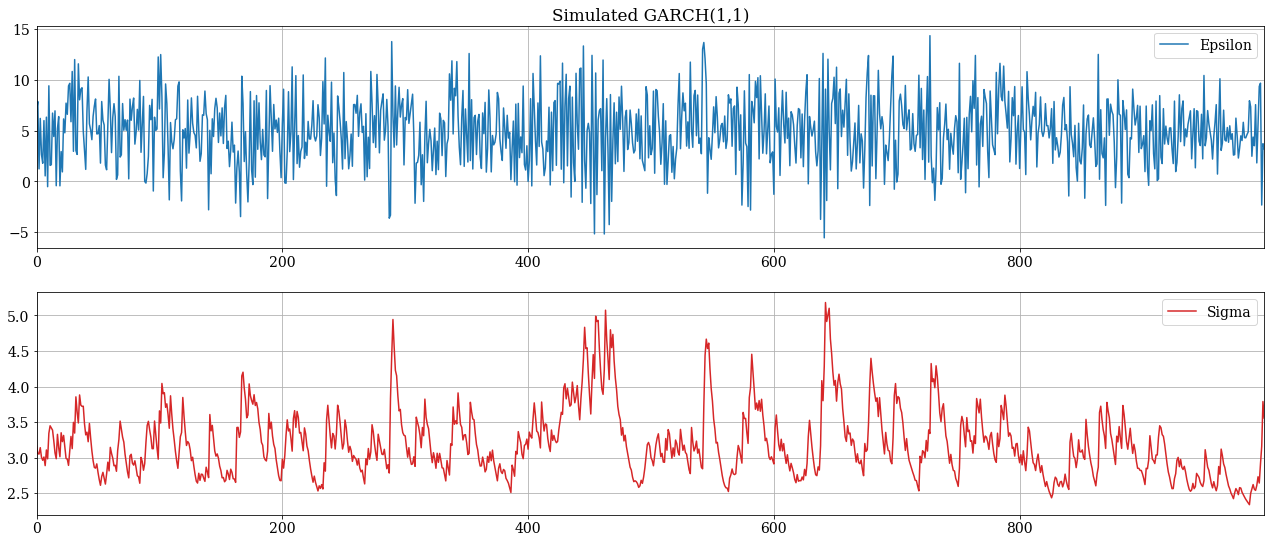

In [82]:
plt.figure(figsize=(22,9))

plt.subplot(2,1,1)
plt.plot(rets, label = 'Epsilon')
plt.grid(True)
plt.autoscale(tight=True, axis = 'x')
plt.title('Simulated GARCH(1,1)')
plt.legend()

plt.subplot(2,1,2)
plt.plot(sigma, color = 'tab:red', label = 'Sigma')
plt.grid(True)
plt.autoscale(tight=True, axis = 'x')
plt.legend()

## Fitting the model

The simplest way to specify a model is to use the model constructor `arch.arch_model` which can specify most common models. The simplest invocation of `arch` will return a model with a **constant mean**, GARCH(1,1) volatility process and normally distributed errors

In [83]:
from arch import arch_model

garch = arch_model(rets)
results = garch.fit(update_freq=10)
print(results.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2598.5538184202437
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2598.55
Distribution:                  Normal   AIC:                           5205.11
Method:            Maximum Likelihood   BIC:                           5224.74
                                        No. Observations:                 1000
Date:                Tue, Feb 01 2022   Df Residuals:                      999
Time:                        13:04:28   Df Model:                            1
                               Mean Model                               
        

## Non-constant mean models

In [84]:
SP500 = yf.download('^GSPC', period='20y')['Adj Close']
SP500 = np.log(SP500)
SP500.name = 'S&P 500'
mkt_rets = (SP500 - SP500.shift(1)).dropna()*100

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'SP500 squared returns')

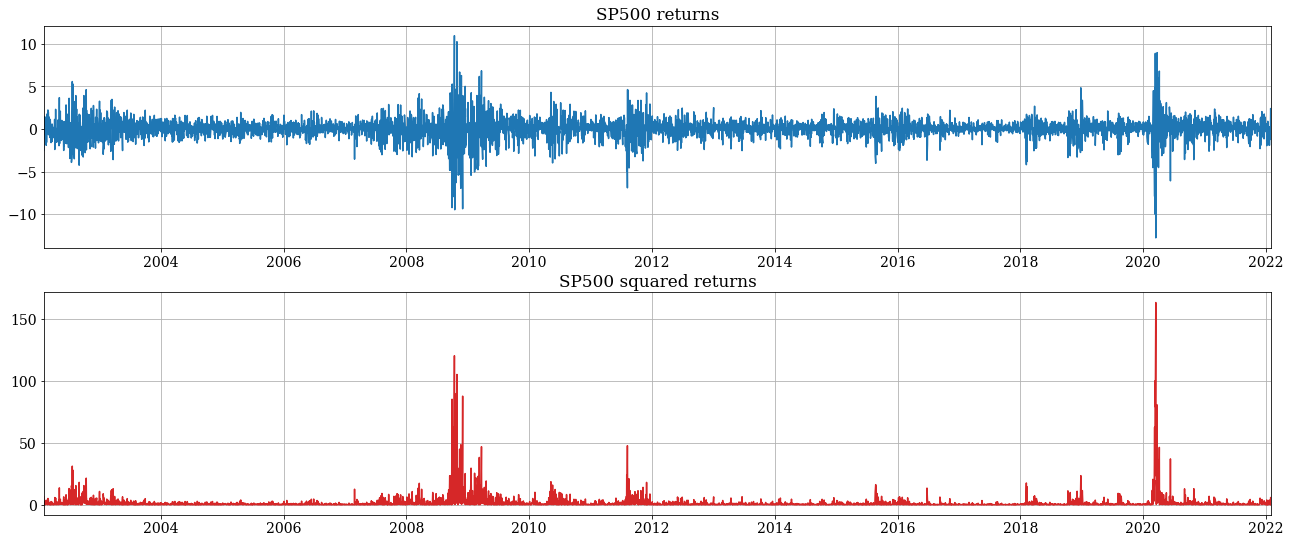

In [85]:
plt.figure(figsize=(22,9))

plt.subplot(2,1,1)
plt.plot(mkt_rets)
plt.grid(True)
plt.autoscale(tight=True, axis = 'x')
plt.title('SP500 returns')

plt.subplot(2,1,2)
plt.plot(np.square(mkt_rets), color = 'tab:Red')
plt.grid(True)
plt.autoscale(tight=True, axis = 'x')
plt.title('SP500 squared returns')

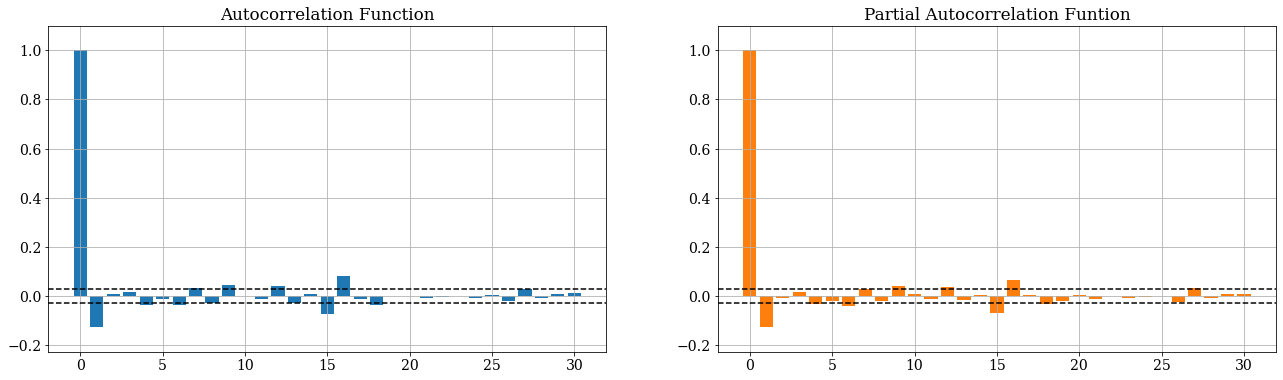

In [86]:
acf_pacf_plots(mkt_rets, 30)

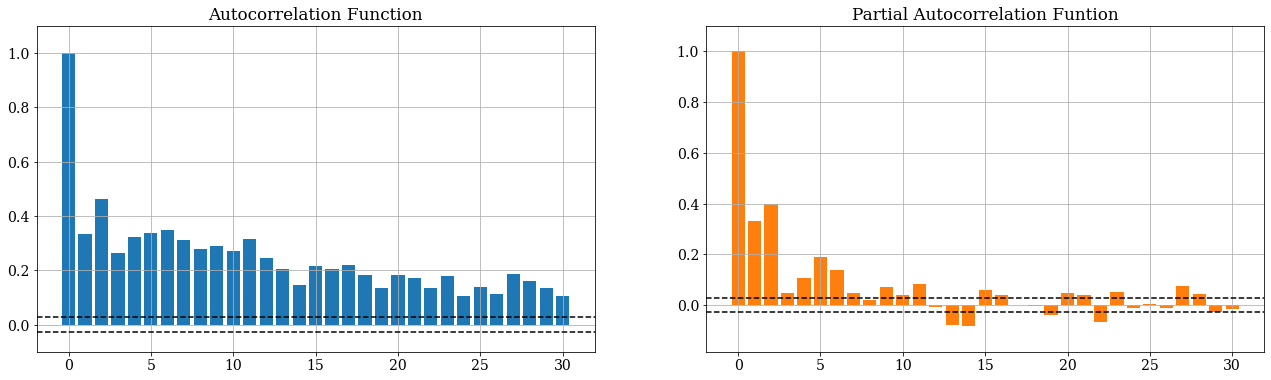

In [87]:
acf_pacf_plots(np.square(mkt_rets), 30)

As we can see, the series has some serial correlations at lag 1, but the key feature is that the PACF of $r_t^2$ shows strong linear dependence.

### Mean model

In [88]:
from arch.univariate import ARX

ar = ARX(mkt_rets, lags=1)

### Volatility model

In [89]:
from arch.univariate import ARCH, GARCH

ar.volatility = GARCH(p=1, q=1)

### Distribution

In [90]:
from arch.univariate import StudentsT
ar.distribution = StudentsT()

In [91]:
res = ar.fit(update_freq=0, disp='off')
print(res.summary())

                              AR - GARCH Model Results                              
Dep. Variable:                      S&P 500   R-squared:                       0.011
Mean Model:                              AR   Adj. R-squared:                  0.010
Vol Model:                            GARCH   Log-Likelihood:               -6584.67
Distribution:      Standardized Student's t   AIC:                           13181.3
Method:                  Maximum Likelihood   BIC:                           13220.5
                                              No. Observations:                 5034
Date:                      Tue, Feb 01 2022   Df Residuals:                     5032
Time:                              13:04:31   Df Model:                            2
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
-----------------------------------------------------------------------------

In [92]:
stand_redis = (res.resid/ res.conditional_volatility).dropna()

Text(0.5, 1.0, 'Conditional volatility')

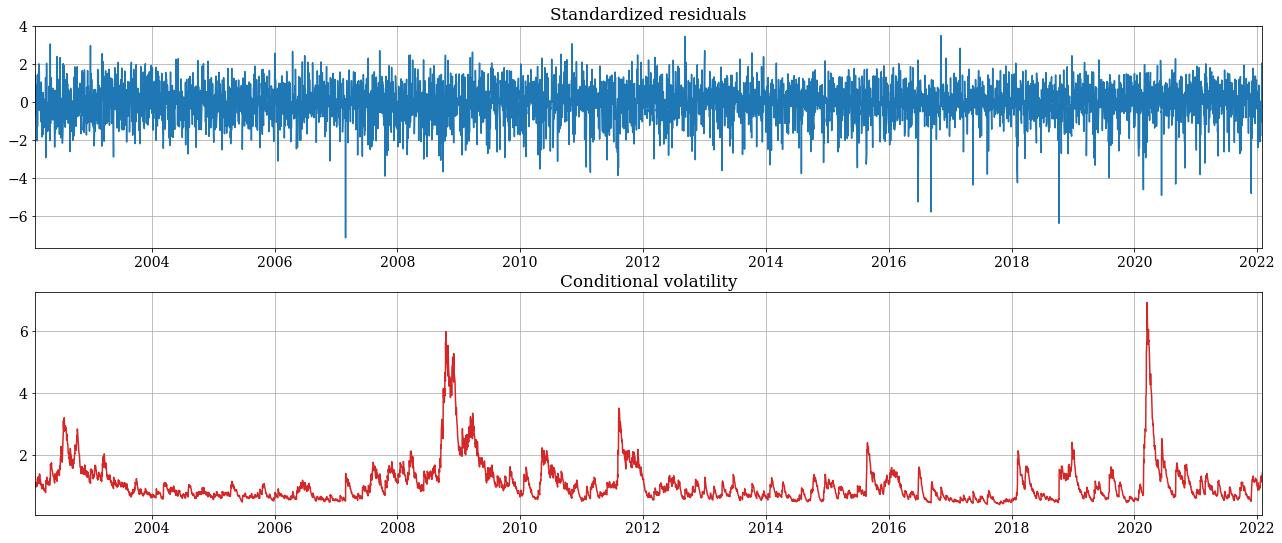

In [93]:
plt.plot(figsize = (22,9))
plt.subplot(2,1,1)
plt.plot(stand_redis)
plt.grid(True)
plt.autoscale(tight = True, axis='x')
plt.title('Standardized residuals')
plt.subplot(2,1,2)
plt.plot(res.conditional_volatility, color = 'tab:red')
plt.grid(True)
plt.autoscale(tight = True, axis='x')
plt.title('Conditional volatility')


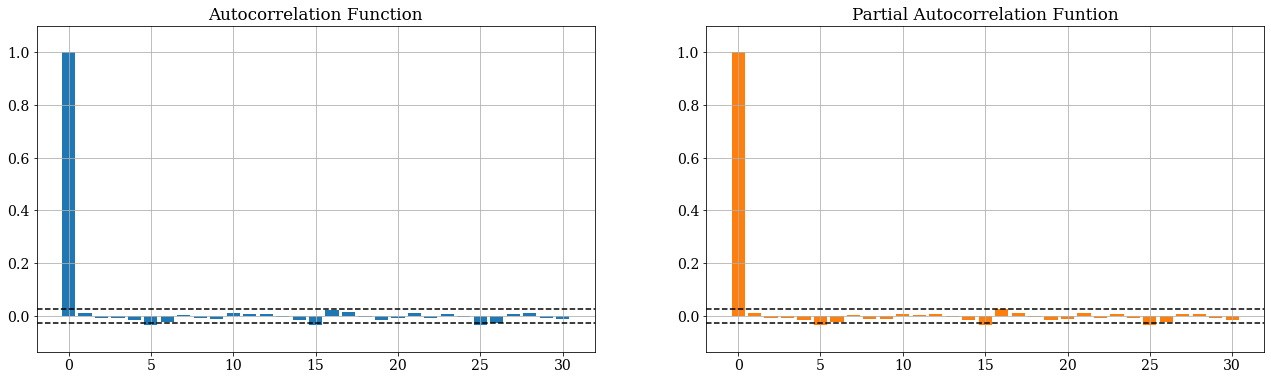

In [94]:
acf_pacf_plots(stand_redis, 30)

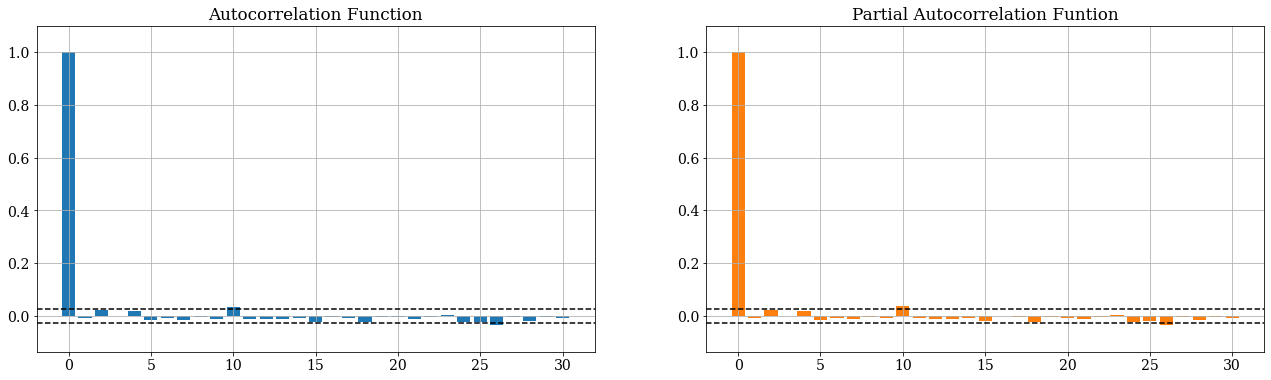

In [95]:
acf_pacf_plots(np.square(stand_redis), 30)

## TGARCH of GJR-GARCH

It has been empirically noted that returns are sometimes negatively correlated with changes in volatility: volatility tends to rise following bad news and fall following good news. This is called the "leverage effect". A volatility model commonly used to handle *leverage* effects is the thershold GARCH (**TGARCH**) from Glosten, Jagannathan and Runkle (1993) (**GJR-GARCH**).

A TGARCH(1,1) assumes the form:

$$\sigma_t^2 = \omega + \alpha_1 \epsilon^2_{t-1} + \gamma_1\epsilon^2_{t-1}I_{[\epsilon_{t-1}<0]} + \beta_1\epsilon^2_{t-1}$$

where $I$ is an indicator function that takes the value 1 when $\epsilon_{t-1}<0$.

From the model, it is seen that a positive $\epsilon_{t-1}$ contributes $\alpha_1\epsilon^2_{t-1}$ to $\sigma_t^2$, whereas a negative $\epsilon_{t-1}$ has a larger impact given by $(\alpha_1+\gamma_1)\epsilon^2_{t-1}$

In [96]:
tgarch = ARX(mkt_rets, lags=1)
tgarch.volatility = GARCH(p=1, q=1, o=1)
res = tgarch.fit(update_freq=5, disp='off')
print(res.summary())

                         AR - GJR-GARCH Model Results                         
Dep. Variable:                S&P 500   R-squared:                       0.013
Mean Model:                        AR   Adj. R-squared:                  0.012
Vol Model:                  GJR-GARCH   Log-Likelihood:               -6630.76
Distribution:                  Normal   AIC:                           13273.5
Method:            Maximum Likelihood   BIC:                           13312.7
                                        No. Observations:                 5034
Date:                Tue, Feb 01 2022   Df Residuals:                     5032
Time:                        13:04:32   Df Model:                            2
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const          0.0346  1.104e-02      3.134  1.726e-

## Forecasting

Multi-period forecasts can be easily produced for ARCH-type models using forward recursion, with some caveats. Inparticular, models that are non-linear in the sense that they do not evolve using squares or residuals do not normallyhave analytically tractable multi-period forecasts available. All models support three methods of forecasting:

- **Analytical**: analytical forecasts are always available for the 1-step ahead forecast due to the structure of ARCH-type models.  Multi-step analytical forecasts are only available for model which are linear in the square of the residual, such as GARCH or HARCH.

- **Simulation**:  simulation-based  forecasts  are  always  available  for  any  horizon,  although  they  are  only  useful for horizons larger than 1 since the first out-of-sample forecast from an ARCH-type model is always fixed. Simulation-based forecasts make use of the structure of an ARCH-type model to forward simulate using the assumed distribution of residuals, e.g., a Normal or Student’s t

- **Bootstrap**: bootstrap-based forecasts are similar to simulation based forecasts except that they make use of the standardized residuals from the actual data used in the estimation rather than assuming a specific distribution. Like simulation-base forecasts, bootstrap-based forecasts are only useful for horizons larger than 1.  Additionally, the bootstrap forecasting method requires a minimal amount of in-sample data to use prior to producing theforecasts.


### Analytical Forecasts

Analytical forecasts are available for most models that evolve in terms of the squares of the model residuals, e.g.,GARCH, HARCH, etc. These forecasts exploit the relationship $E_t[\epsilon^2_{t+1}] = \sigma^2_{t+1}$ to recursively compute forecasts. 

Variance forecasts are constructed for the conditional variances as:

$$\sigma_{t+1}^2 = \omega + \alpha_1\epsilon_t^2 + \beta_1\sigma_t^2$$

$$\sigma_{t+h}^2 = \omega + \alpha_1 E_t[\epsilon_{t+h-1}^2] + \beta_1 E_t[\sigma_{t+h-1}^2] \ for \ h\geq2  $$

$$\sigma_{t+h}^2 = \omega + (\alpha + \beta) E_t[\epsilon_{t+h-1}^2] \ for \ h \geq 2  $$


In [97]:
forecasts = res.forecast(start = mkt_rets.index[-1], horizon = 6)

C:\Users\jsaul\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [98]:
df_forecast = pd.DataFrame(columns = ['t+1','t+2','t+3','t+4','t+5','t+6'], index = ['Conditional Mean', 'Conditional Volatility', 'Conditional Residual Volatility'])
df_forecast.iloc[0] = forecasts.mean.iloc[-1:].values
df_forecast.iloc[1] = np.sqrt(forecasts.variance.iloc[-1:].values)
df_forecast.iloc[2] = np.sqrt(forecasts.residual_variance.iloc[-1:].values)

df_forecast

t+1        t+2       t+3        t+4  \
Conditional Mean                 0.0432518  0.0316759  0.032457  0.0324043   
Conditional Volatility              1.1465    1.14511   1.14119    1.13735   
Conditional Residual Volatility     1.1465    1.14249   1.13857    1.13474   

                                       t+5        t+6  
Conditional Mean                 0.0324079  0.0324076  
Conditional Volatility             1.13359    1.12991  
Conditional Residual Volatility    1.13099    1.12732

### Simulation Forecasts

Simulation-based forecasts use the model random number generator to simulate draws of the standardized residuals, $\epsilon_{t+h}$. These are used to generate a pre-specified number of paths of the variances which are then averaged to produce the  forecasts. In  models  like  GARCH  which  evolve  in  the  squares  of  the  residuals,  there  are  few  advantages  to simulation-based forecasting. These methods are more valuable when producing multi-step forecasts from models that do not have closed form multi-step forecasts such as EGARCH models.

Assume there are B simulated paths. A single simulated path is generated using:

$$\sigma_{t+h,b}^2 = \omega + \alpha_1\epsilon^2_{t+h-1, b}+ \beta_1\sigma^2_{t+h-1,b} $$

$$\epsilon_{t+h,b} = z_{t+h,b}\sigma_{t+h,b}$$

where  the  simulated  shocks  are $z_{t+1,b}, z_{t+2,b}, \dots, z_{t+h,b} $ where b is  included  to  indicate  that  the  simulations  are independent across paths. Note that the first residual, $\epsilon_t$, is in-sample and so is not simulated.

The final variance forecasts are then computed using the B simulations


$$E_t[\epsilon^2_{t+h}] = \sigma^2_{t+h} = B^{-1} \sum_{b=1}^B\sigma^2_{t+h, b}$$


In [99]:
forecasts = res.forecast(horizon=5, method='simulation')
sims = forecasts.simulations

C:\Users\jsaul\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


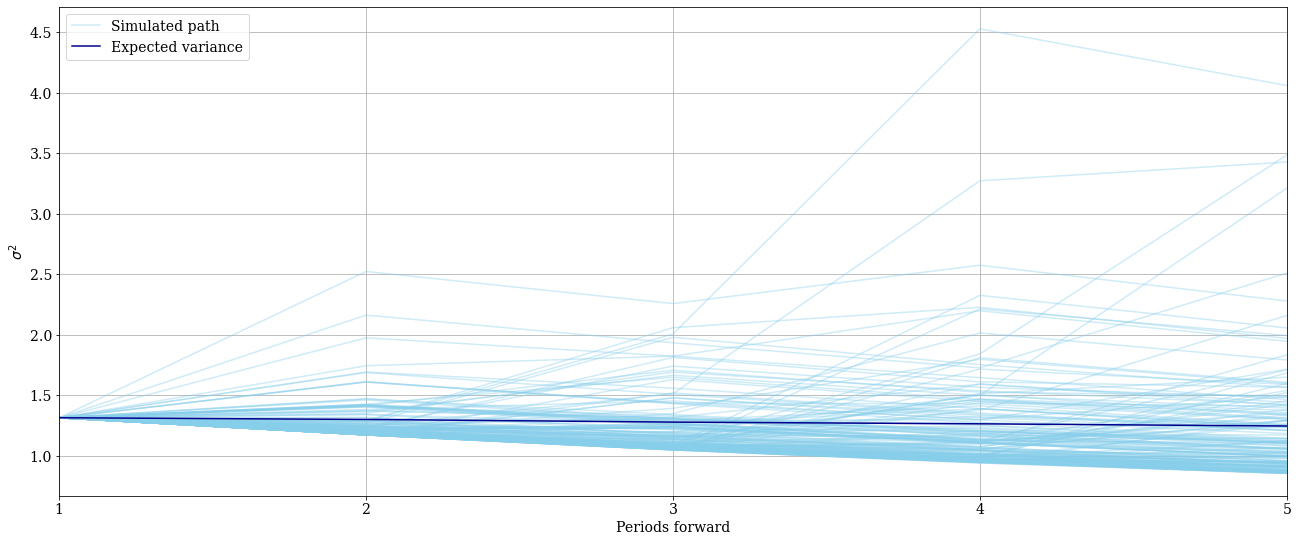

In [100]:
x = np.arange(1,6)
plt.figure(figsize = (22,9))
lines = plt.plot(x, sims.residual_variances[-1, ::6].T, color='skyblue', alpha=0.4)
lines[0].set_label('Simulated path')
line = plt.plot(x, forecasts.variance.iloc[-1].values, color='darkblue')
line[0].set_label('Expected variance')
plt.xticks(x)
plt.autoscale(tight = True, axis = 'x')
plt.legend()
plt.grid(True)
plt.xlabel('Periods forward')
plt.ylabel('$\sigma^2$');

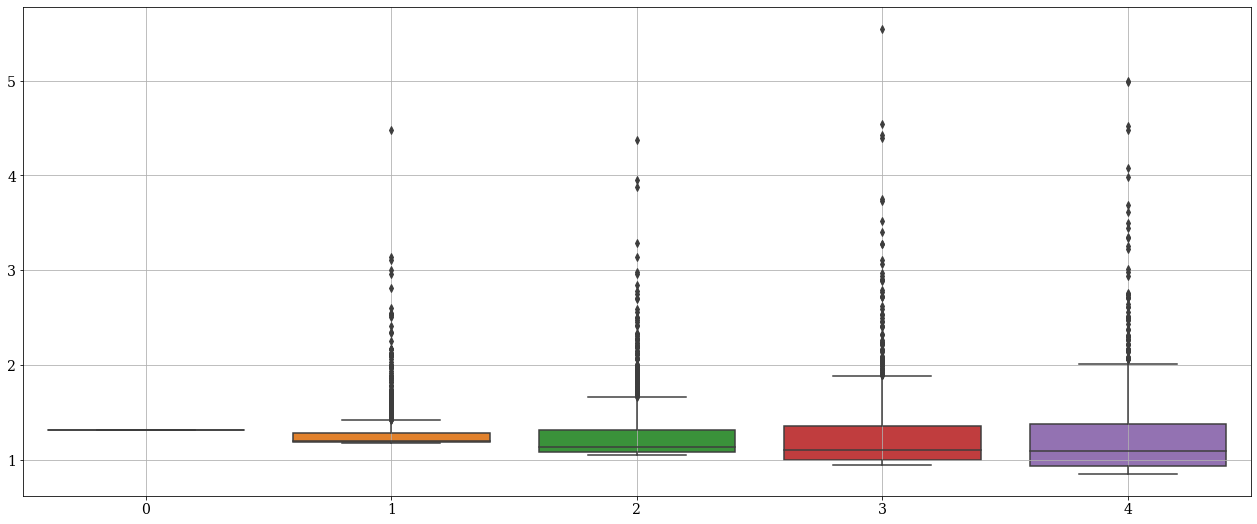

In [101]:
plt.figure(figsize = (22,9))
sns.boxplot(data=sims.variances[-1])
plt.grid(True)

## Bootstrap Forecasts

Bootstrap-based forecasts are virtually identical to simulation-based forecasts except that the standardized residuals are generated by the model.  These standardized residuals are generated using the observed data and the estimated parameters as

$$\hat{\epsilon_t} = \dfrac{r_t - \hat{\mu}}{\hat{\sigma}}$$

The generation scheme is identical to the simulation-based method except that the simulated shocks are drawn (i.i.d.,with replacement) from $\hat{\epsilon_{1}}, \hat{\epsilon_{2}}, \dots, \hat{\epsilon_{t}} $so that only data available at time𝑡are used to simulate the paths

In [102]:
forecasts = res.forecast(horizon=5, method='bootstrap')
sims = forecasts.simulations

C:\Users\jsaul\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [103]:
conf_int = pd.DataFrame(sims.residual_variances[-1], columns = [1, 2, 3, 4, 5]).quantile([0.025, 0.975])

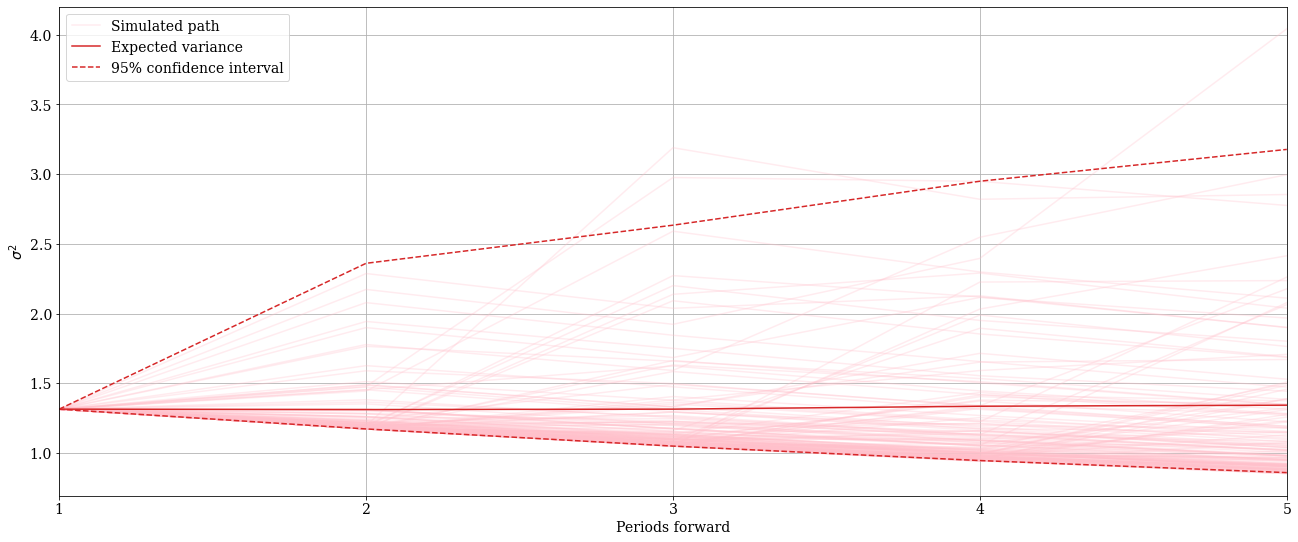

In [104]:
x = np.arange(1,6)
plt.figure(figsize = (22,9))
lines = plt.plot(x, sims.residual_variances[-1,::7].T, color='pink', alpha=0.3)
lines[0].set_label('Simulated path')
line = plt.plot(x, forecasts.variance.iloc[-1].values, color='tab:red')
line[0].set_label('Expected variance')
line = plt.plot(conf_int.T, color = 'tab:red', linestyle = 'dashed')
line[0].set_label('95% confidence interval')
plt.xticks(x)
plt.autoscale(tight = True, axis = 'x')
plt.legend()
plt.grid(True)
plt.xlabel('Periods forward')
plt.ylabel('$\sigma^2$');

## Value-at-Risk forecasting 

Value-at-Risk (VaR) forecasts from GARCH models depend on the conditional mean, the conditional volatility andthe quantile of the standardized residuals,

$$VaR_{t+1|t} = -\mu_{t+1|t} - \sigma_{t+1|t}q_\alpha$$

where $q_\alpha$ is the $\alpha$ quantile of the standardized residuals, e.g., 5%.

The quantile can be either computed from the estimated model density or computed using the empirical distribution of the standardized residuals. The example below shows both methods.

In [105]:
am = arch_model(mkt_rets, vol='Garch', p=1, o=0, q=1, dist='skewt')
res = am.fit(disp='off', last_obs='2018-12-31')

### Parametric VaR

In [106]:
forecasts = res.forecast(start='2019-1-1')
cond_mean = forecasts.mean['2019':]
cond_var = forecasts.variance['2019':]
q = am.distribution.ppf([0.01,0.05], res.params[-2:])
print(q)

[-2.69112686 -1.65332704]


C:\Users\jsaul\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


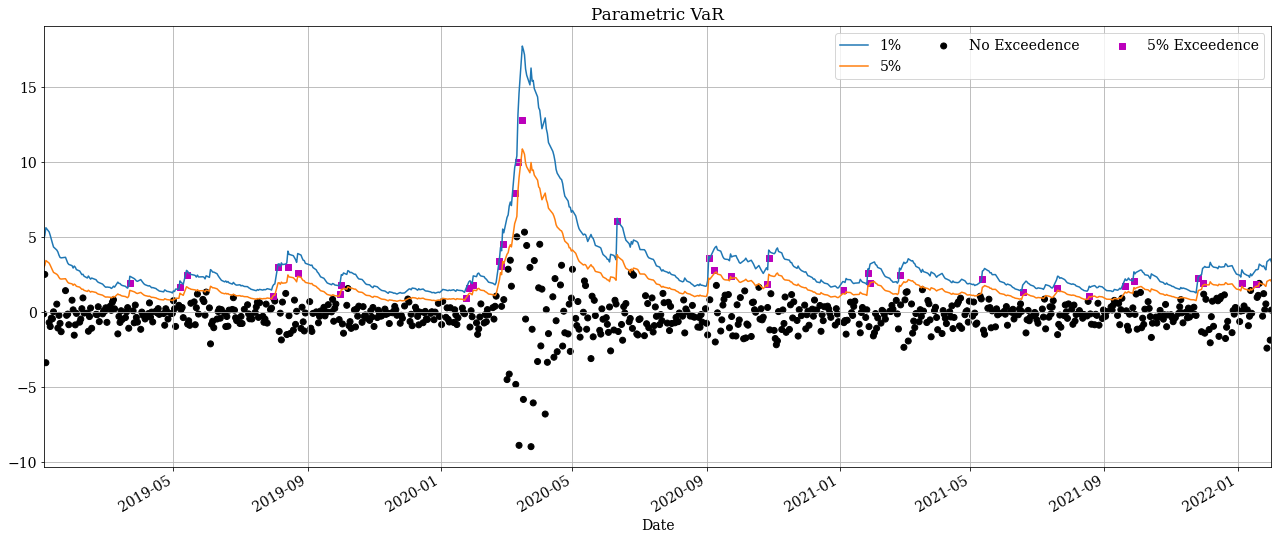

In [107]:
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values*q[None, :]
value_at_risk = pd.DataFrame(value_at_risk, columns=['1%','5%'], index=cond_var.index)
ax = value_at_risk.plot(legend=False)
xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])
rets_2019 = mkt_rets['2019':].copy()
rets_2019.name ='S&P 500 Return'
c = []
for idx in value_at_risk.index:
    if rets_2019[idx] > -value_at_risk.loc[idx,'5%']:
        c.append('#000000')
    elif rets_2019[idx] < -value_at_risk.loc[idx,'1%']:
        c.append('#BB0000')
    else:
        c.append('#BB00BB')
c = np.array(c, dtype='object')
labels = {'#BB0000':'1% Exceedence','#BB00BB':'5% Exceedence','#000000':'No Exceedence'}
markers = {'#BB0000':'x','#BB00BB':'s','#000000':'o'}
for color in np.unique(c):
    sel = c == color
    ax.scatter(rets_2019.index[sel], 
               -rets_2019.loc[sel],
               marker=markers[color],
               c=c[sel],
               label=labels[color])
ax.set_title('Parametric VaR')
plt.grid(True)
leg = ax.legend(ncol=3)

###  Filtered Historical Simulation

In [108]:
std_rets = (mkt_rets[:'2018'] - res.params['mu']) / res.conditional_volatility
std_rets = std_rets.dropna()
q = std_rets.quantile([.01, .05])
print(q)

0.01   -2.741268
0.05   -1.742361
dtype: float64


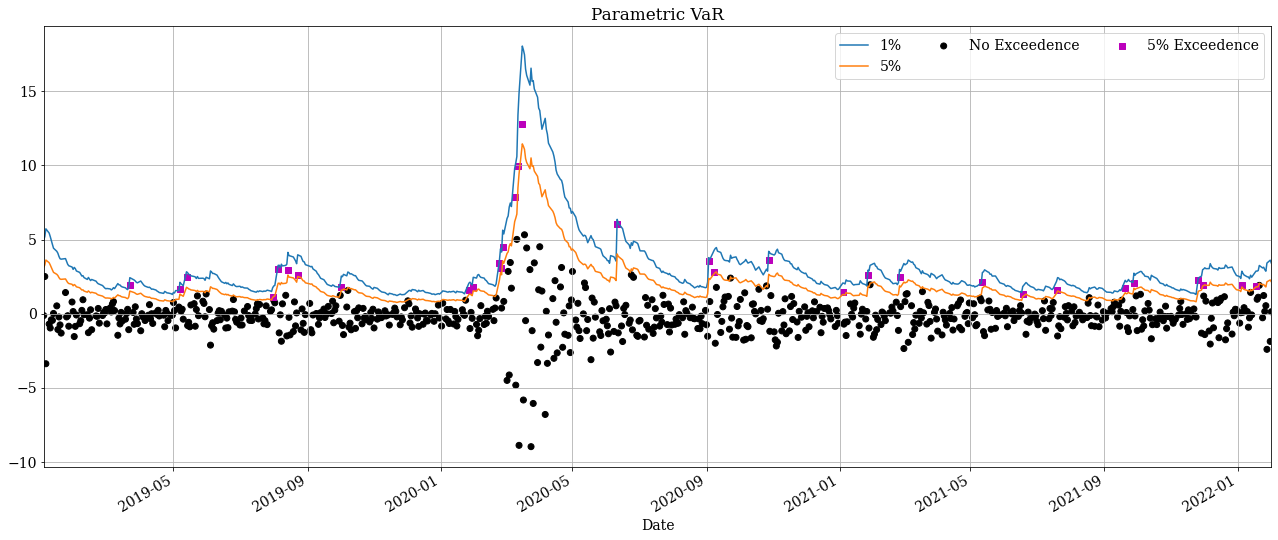

In [109]:
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values*q[None, :]
value_at_risk = pd.DataFrame(value_at_risk, columns=['1%','5%'], index=cond_var.index)
ax = value_at_risk.plot(legend=False)
xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])
rets_2019 = mkt_rets['2019':].copy()
rets_2019.name ='S&P 500 Return'
c = []
for idx in value_at_risk.index:
    if rets_2019[idx] > -value_at_risk.loc[idx,'5%']:
        c.append('#000000')
    elif rets_2019[idx] < -value_at_risk.loc[idx,'1%']:
        c.append('#BB0000')
    else:
        c.append('#BB00BB')
c = np.array(c, dtype='object')
labels = {'#BB0000':'1% Exceedence','#BB00BB':'5% Exceedence','#000000':'No Exceedence'}
markers = {'#BB0000':'x','#BB00BB':'s','#000000':'o'}
for color in np.unique(c):
    sel = c == color
    ax.scatter(rets_2019.index[sel], 
               -rets_2019.loc[sel],
               marker=markers[color],
               c=c[sel],
               label=labels[color])
ax.set_title('Parametric VaR')
plt.grid(True)
leg = ax.legend(ncol=3)

# Cointegration
----
Finally, now that we've discussed stationarity and order of integration, we can discuss cointegration.


**Linear combination:** A linear combination of the time series ($X_1$, $X_2$, $\dots$, $X_k$) is a new time series $Y$ constructed as follows for any set of real numbers $b_1 \dots b_k$

$$Y=b_1X_1+b_2X_2+⋯+b_kX_k$$


**Cointegration:** For some set of time series ($X_1$, $X_2$, $\dots$, $X_k$), if all series are $I(1)$, and some linear combination of them is $I(0)$, we say the set of time series is cointegrated.

Cointegration is a more subtle relationship than correlation. If two time series are cointegrated, there is some linear combination between them that will vary around a mean. At all points in time, the combination between them is related to the same probability distribution.

If we find two cointegreted assets, $A_1, A_2$, this mean that the linear combination of their prices $B = b_1A_1 + b_2A_2$ is mean reverting and we can bet on $B$ and place trades accordingly.


### Simulated data example


In [110]:
N = 200

# Generate a stationary random X1
X1 = np.random.normal(0, 1, N)

# Integrate it to make it I(1)
X1 = np.cumsum(X1)
X1 = pd.Series(X1, name = 'X1')

# Define X2 that is a constant + X1 + some noise
noise = np.random.normal(0, 1, N)
const = 3
X2 = const + X1 + noise
X2.name ='X2'

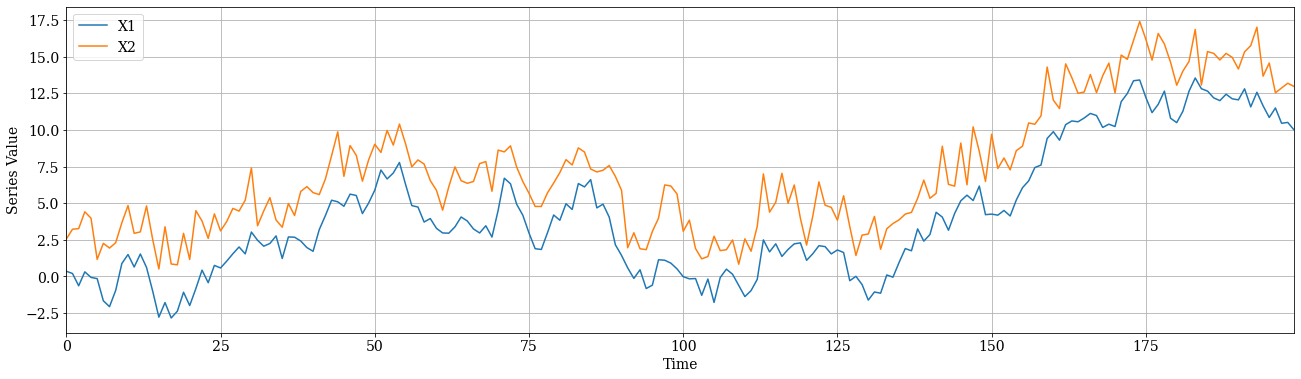

In [111]:
fig = plt.figure(figsize = (22,6))
plt.plot(X1, label = 'X1')
plt.plot(X2, label = 'X2')
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend(loc = 'best')
plt.autoscale(axis = 'x', tight = True)
plt.grid(True);

In [112]:
check_for_stationarity(X1)
check_for_stationarity(X2)

p-value = 0.6232 The series X1 is likely non-stationary.
p-value = 0.825 The series X2 is likely non-stationary.


Now to show cointegration we'll need to find some linear combination of $X_1$ and $X_2$ that is stationary. We can take $X_2-X_1$. All that's left over should be stationary noise by design. Let's check this.

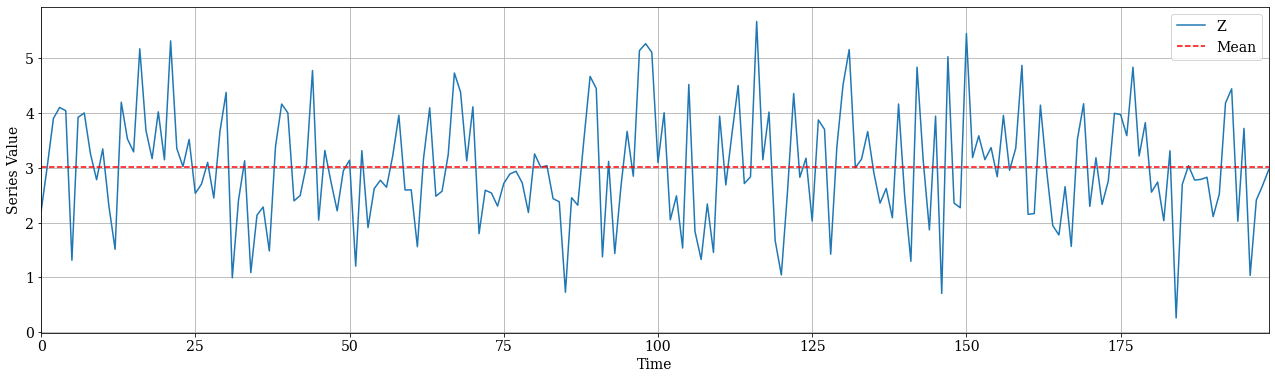

In [113]:
Z = X2 - X1
Z.name = 'Z'


fig = plt.figure(figsize = (22,6))
plt.plot(Z, label = 'Z')
plt.axhline(Z.mean(), color='red', linestyle='--', label = 'Mean')
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend(loc = 'best')
plt.autoscale(axis = 'x', tight = True)
plt.grid(True);

In [114]:
check_for_stationarity(Z)

p-value = 0.0 The series Z is likely stationary.


### Testing for Cointegration

There are many ways to test for cointegration. In general we are just trying to solve for the coefficients $b_1, \dots b_k$ that will produce an $I(0)$ linear combination. 

In practice a common way to do this for pairs of time series is to use linear regression to estimate $\beta$ in the following model.
$$X_2=\alpha+\beta X_1+\mu$$

The idea is that if the two are cointegrated we can remove $X_2$'s depedency on $X_1$, leaving behind stationary noise. The combination $X_2 - \beta X_1 = \alpha + \mu$ should be stationary.

Notice that for $X_1$ and $X_2$ to be cointegrated, $\mu$ should be $I(0)$. Otherwise, the relationship could be spurious.

There is a convenient cointegration test that lives in **statsmodels.tsa.stattools**. Let's say that our confidence level is 0.05. We should see a p-value below our cutoff, as we've artifically created two series that are the textbook definition of cointegration.

In [115]:
score, pvalue, _ = coint(X1,X2)
print('p-value: '+str(round(pvalue)))
if pvalue<0.05:
    print('The series are cointegrated')
else:
    print('The series are not cointegrated')

p-value: 0
The series are cointegrated


### Correlation vs. Cointegration

Correlation and cointegration, while theoretically similar, are not the same. To demonstrate this, we'll show examples of series that are correlated, but not cointegrated, and vice versa. To start let's check the correlation of the series we just generated.

In [116]:
X1.corr(X2).round(3)

0.972

That's very high, as we would expect. But how would two series that are correlated but not cointegrated look?

### Correlation without cointegration

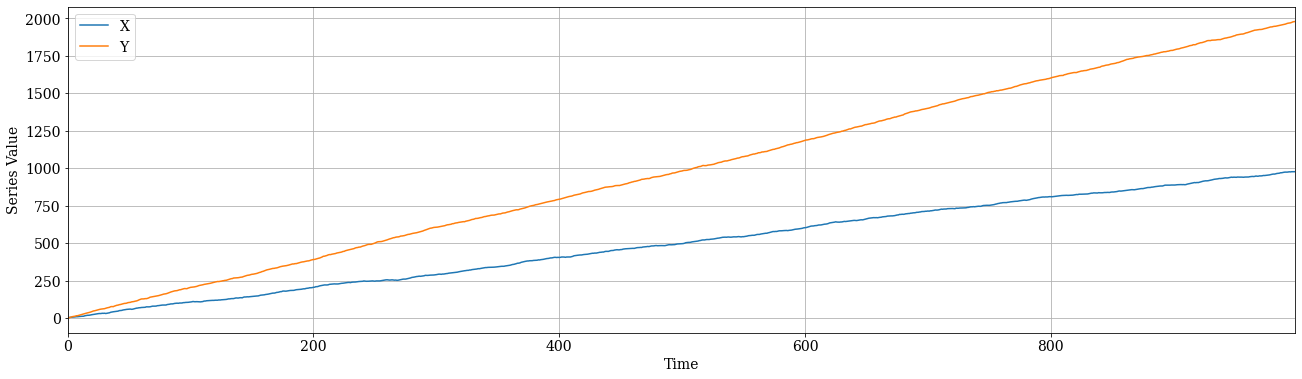

In [117]:
X_returns = np.random.normal(1, 1, 1000)
Y_returns = np.random.normal(2, 1, 1000)

X_diverging = pd.Series(np.cumsum(X_returns), name='X')
Y_diverging = pd.Series(np.cumsum(Y_returns), name='Y')

fig = plt.figure(figsize = (22,6))
plt.plot(X_diverging, label = 'X')
plt.plot(Y_diverging, label = 'Y')
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend(loc = 'best')
plt.autoscale(axis = 'x', tight = True)
plt.grid(True)

In [118]:
print ('Correlation: ' + str(X_diverging.corr(Y_diverging).round(4)))
score, pvalue, _ = coint(X_diverging,Y_diverging)
print ('Cointegration test p-value: ' + str(pvalue.round(4)))

Correlation: 0.9995
Cointegration test p-value: 0.6155


### Cointegration without correlation

A simple example of this case is a normally distributed series and a square wave.

In [119]:
N = 1000
Y1 = pd.Series(np.random.normal(0, 1, N), name='Y1') + 20
Y2 = Y1.copy()

Y2[0:100] = 30
Y2[100:200] = 10
Y2[200:300] = 30
Y2[300:400] = 10
Y2[400:500] = 30
Y2[500:600] = 10
Y2[600:700] = 30
Y2[700:800] = 10
Y2[800:900] = 30
Y2[900:1000] = 10

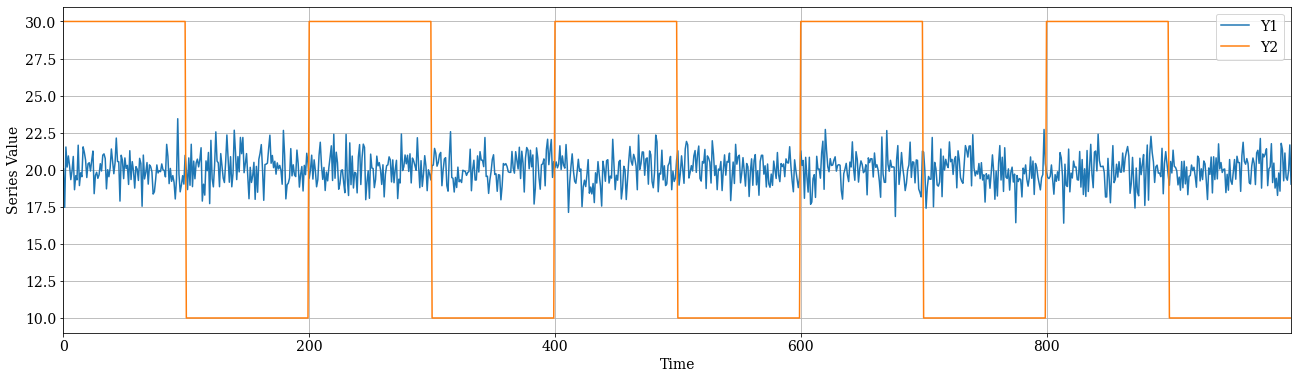

In [120]:
fig = plt.figure(figsize = (22,6))
plt.plot(Y1, label = 'Y1')
plt.plot(Y2, label = 'Y2')
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend(loc = 'best')
plt.autoscale(axis = 'x', tight = True)
plt.grid(True)

In [121]:
print('Correlation: ' + str(Y1.corr(Y2).round(4)))
score, pvalue, _ = coint(Y1,Y2)
print('Cointegration test p-value: ' + str(np.round(pvalue,4)))

Correlation: -0.0397
Cointegration test p-value: 0.0


Note how this process fluctuates around some central value. This value is the mean of our time series.

## Tail Risk

Autoregressive processes will tend to have more extreme values than data drawn from, for example, a normal distribution. This is because the value at each time point is influenced by recent values. If the series randomly jumps up, it is more likely to stay up than a non-autoregressive series. This is known as 'fat-tailledness' (fat-tailed distribution) because the extremes on the pdf will be fatter than in a normal distribution.

Much talk of tail risk in finance comes from the fact that tail events do occur and are hard to model due to their infrequent occurrence. If we have reason to suspect that a process is autoregressive, we should expect risk from extreme tail events and adjust accordingly.

Let's now check for that behavior.

In [122]:
b = np.array([0, 0.9])
g = np.array([0.5])
X = simulate_ARMA(b,g)
Y = np.random.normal(X.mean(),1, 1000)

Text(0.5, 0, 'Value')

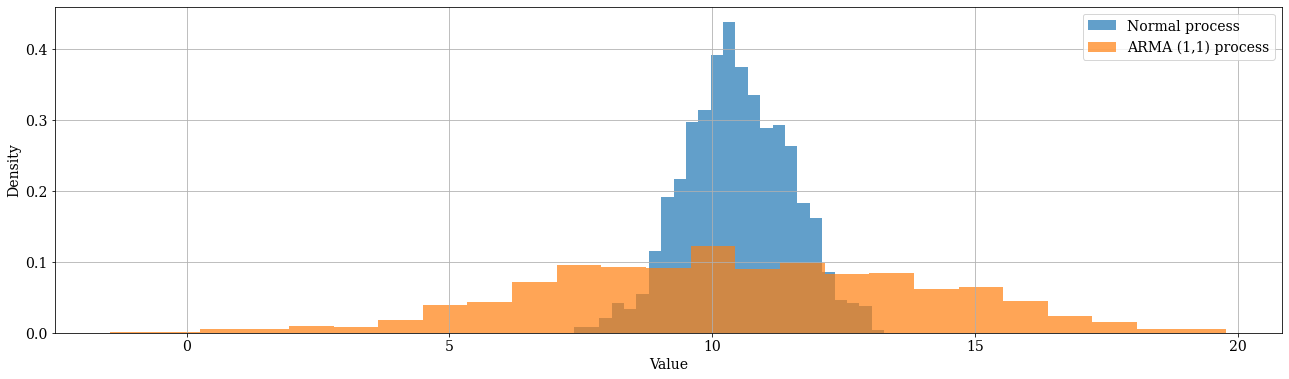

In [123]:
fig = plt.figure(figsize = (22,6))
plt.hist(Y, bins= 25, alpha = 0.7, density = True, label = 'Normal process')
plt.hist(X, bins = 25, alpha=0.7, density = True, label = 'ARMA (1,1) process')
plt.grid(True)
plt.legend(loc = 'best')
plt.ylabel('Density')
plt.xlabel('Value')